In [ ]:
### Sentiment analysis: This involves using natural language processing techniques to analyze the sentiment of financial reviews and identify positive or negative opinions about a company's performance or prospects

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import string
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\sentimental analysis\\financial_sentiment_data.csv")
df

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [5]:
df.duplicated().sum()

6

In [6]:
df.drop_duplicates(inplace=True)

In [5]:
df['Sentence'][3]

'According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .'

# Analysis on all the reviews

In [8]:
df[df['Sentiment']=='neutral']

Sentence Sentiment
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
9     The Stockmann department store will have a tot...   neutral
13             Viking Line has canceled some services .   neutral
14    Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...   neutral
...                                                 ...       ...
5833  In 2008 , Kemira recorded revenue of approxima...   neutral
5834  Investments in product development stood at 6....   neutral
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral

[3130 rows x 2 columns]

In [10]:
df['Sentence'][14]

"Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEMENT 7.2.2007 at 10.30 A total of 56,955 new shares of Ahlstrom Corporation have been subscribed with option rights under the company 's stock option programs I 2001 and II 2001 ."

In [8]:
words = ' '.join(df['Sentence']).split()


num_count = 0
text_count = 0
punct_count = 0
others=0


for char in words:
    if char.isdigit():
        num_count += 1
    elif char.isalpha():
        text_count += 1
    elif char in string.punctuation:
        punct_count += 1
    else:
        others+=1


counts_dict = {
    'Numbers': num_count,
    'Text': text_count,
    'Punctuation': punct_count,
    'Others':others
}
counts_series = pd.Series(counts_dict)

print(counts_series)


Numbers         3460
Text           96837
Punctuation    11991
Others         10244
dtype: int64


In [9]:
counts_series[1]

96837

Text(0.5, 1.0, 'No of text string')

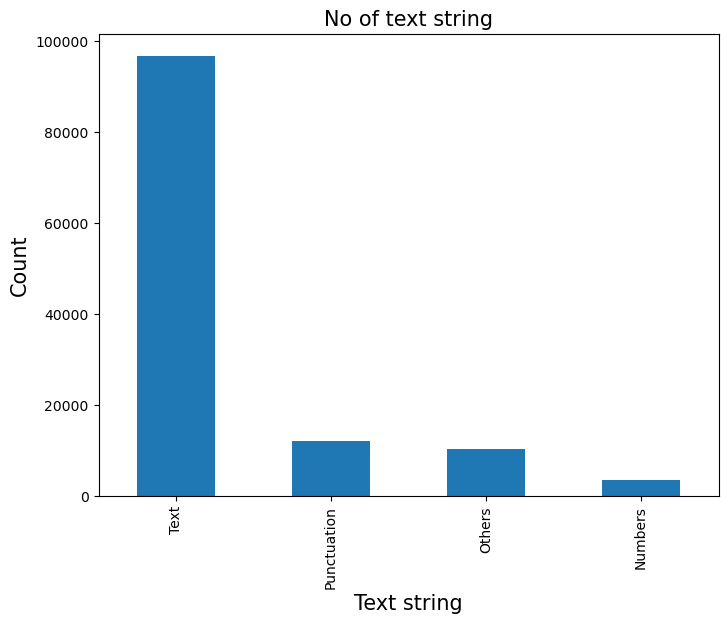

In [10]:
fig=plt.figure(figsize=(8,6))
counts_series.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Text string',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('No of text string',fontsize=15)

# Analysis before EDA

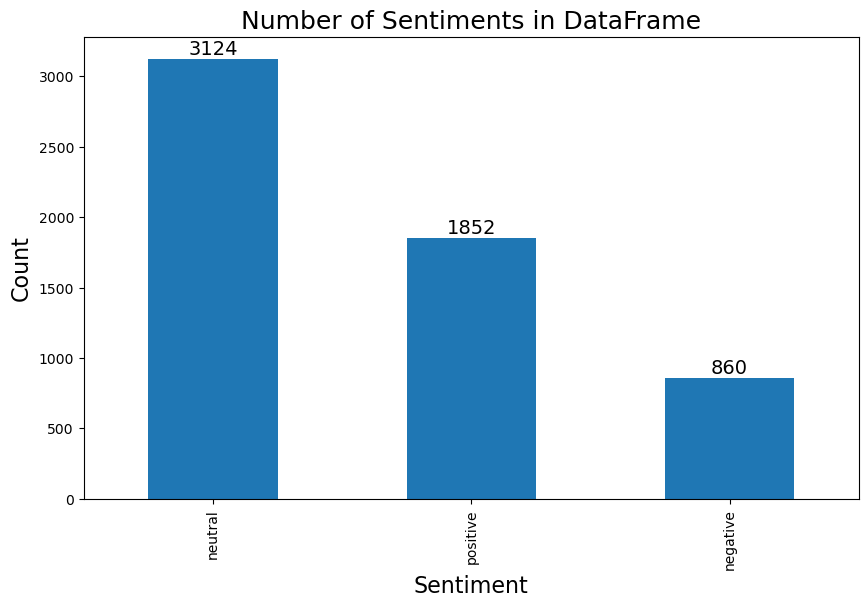

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

sentiment_counts = df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Sentiments in DataFrame', fontsize=18)

for i, j in enumerate(sentiment_counts):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize=14)
plt.show()


# Stop words

In [12]:
stop_words = stopwords.words("english")
from collections import defaultdict
review_sw=defaultdict(int)
cnt=0
for char in words:
    if char in stop_words:
        review_sw[char]+=1

Text(0.5, 1.0, 'Most Frequently occured stopwords')

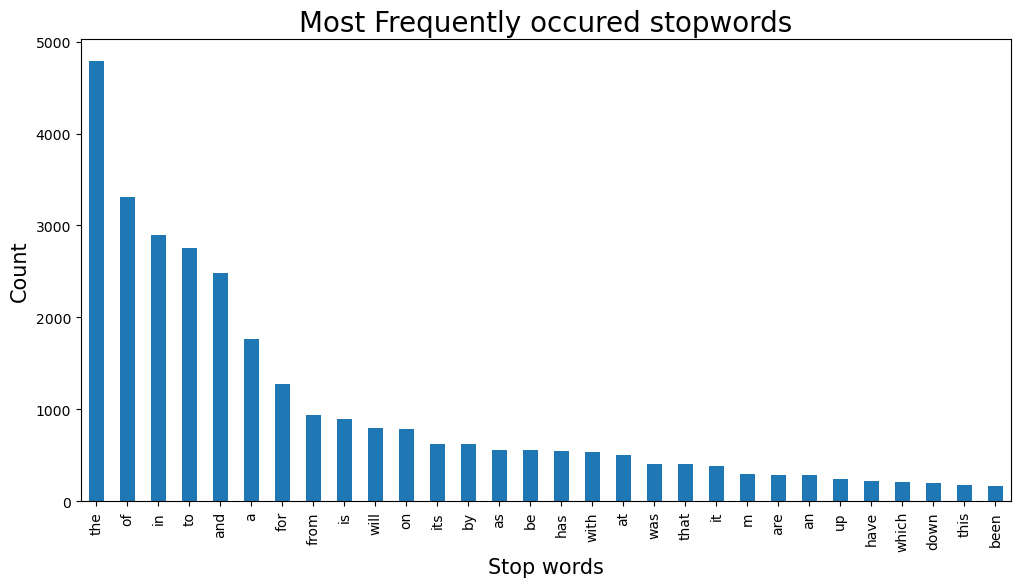

In [13]:
review_sw_series=pd.Series(review_sw).sort_values(ascending=False)
plt.figure(figsize=(12,6))
review_sw_series.head(30).plot(kind='bar')
plt.xlabel('Stop words',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Most Frequently occured stopwords',fontsize=20)

# Splitting the reviews based on positive,negative,neutral sentiment

In [14]:
pos_words=[]
neg_words=[]
neu_words=[]

for i,j in zip(df.Sentence,df.Sentiment):
    words=i.split()
    if j=='positive':
        pos_words.extend(words)
    elif j=='negative':
        neg_words.extend(words)
    else:
        neu_words.extend(words)

# Analyzing on positive words

In [15]:
def plot_cloud(workcloud):
    plt.figure(figsize=(30,40))
    plt.imshow(workcloud)
    plt.axis('off')

In [16]:
import re

def remove_url(text):
    
    text = re.sub(r'http\S+', '', text)
    
    
    text = re.sub(r'www\S+', '', text)
    
    return text

for i in range(len(pos_words)):
    pos_words[i] = remove_url(pos_words[i])

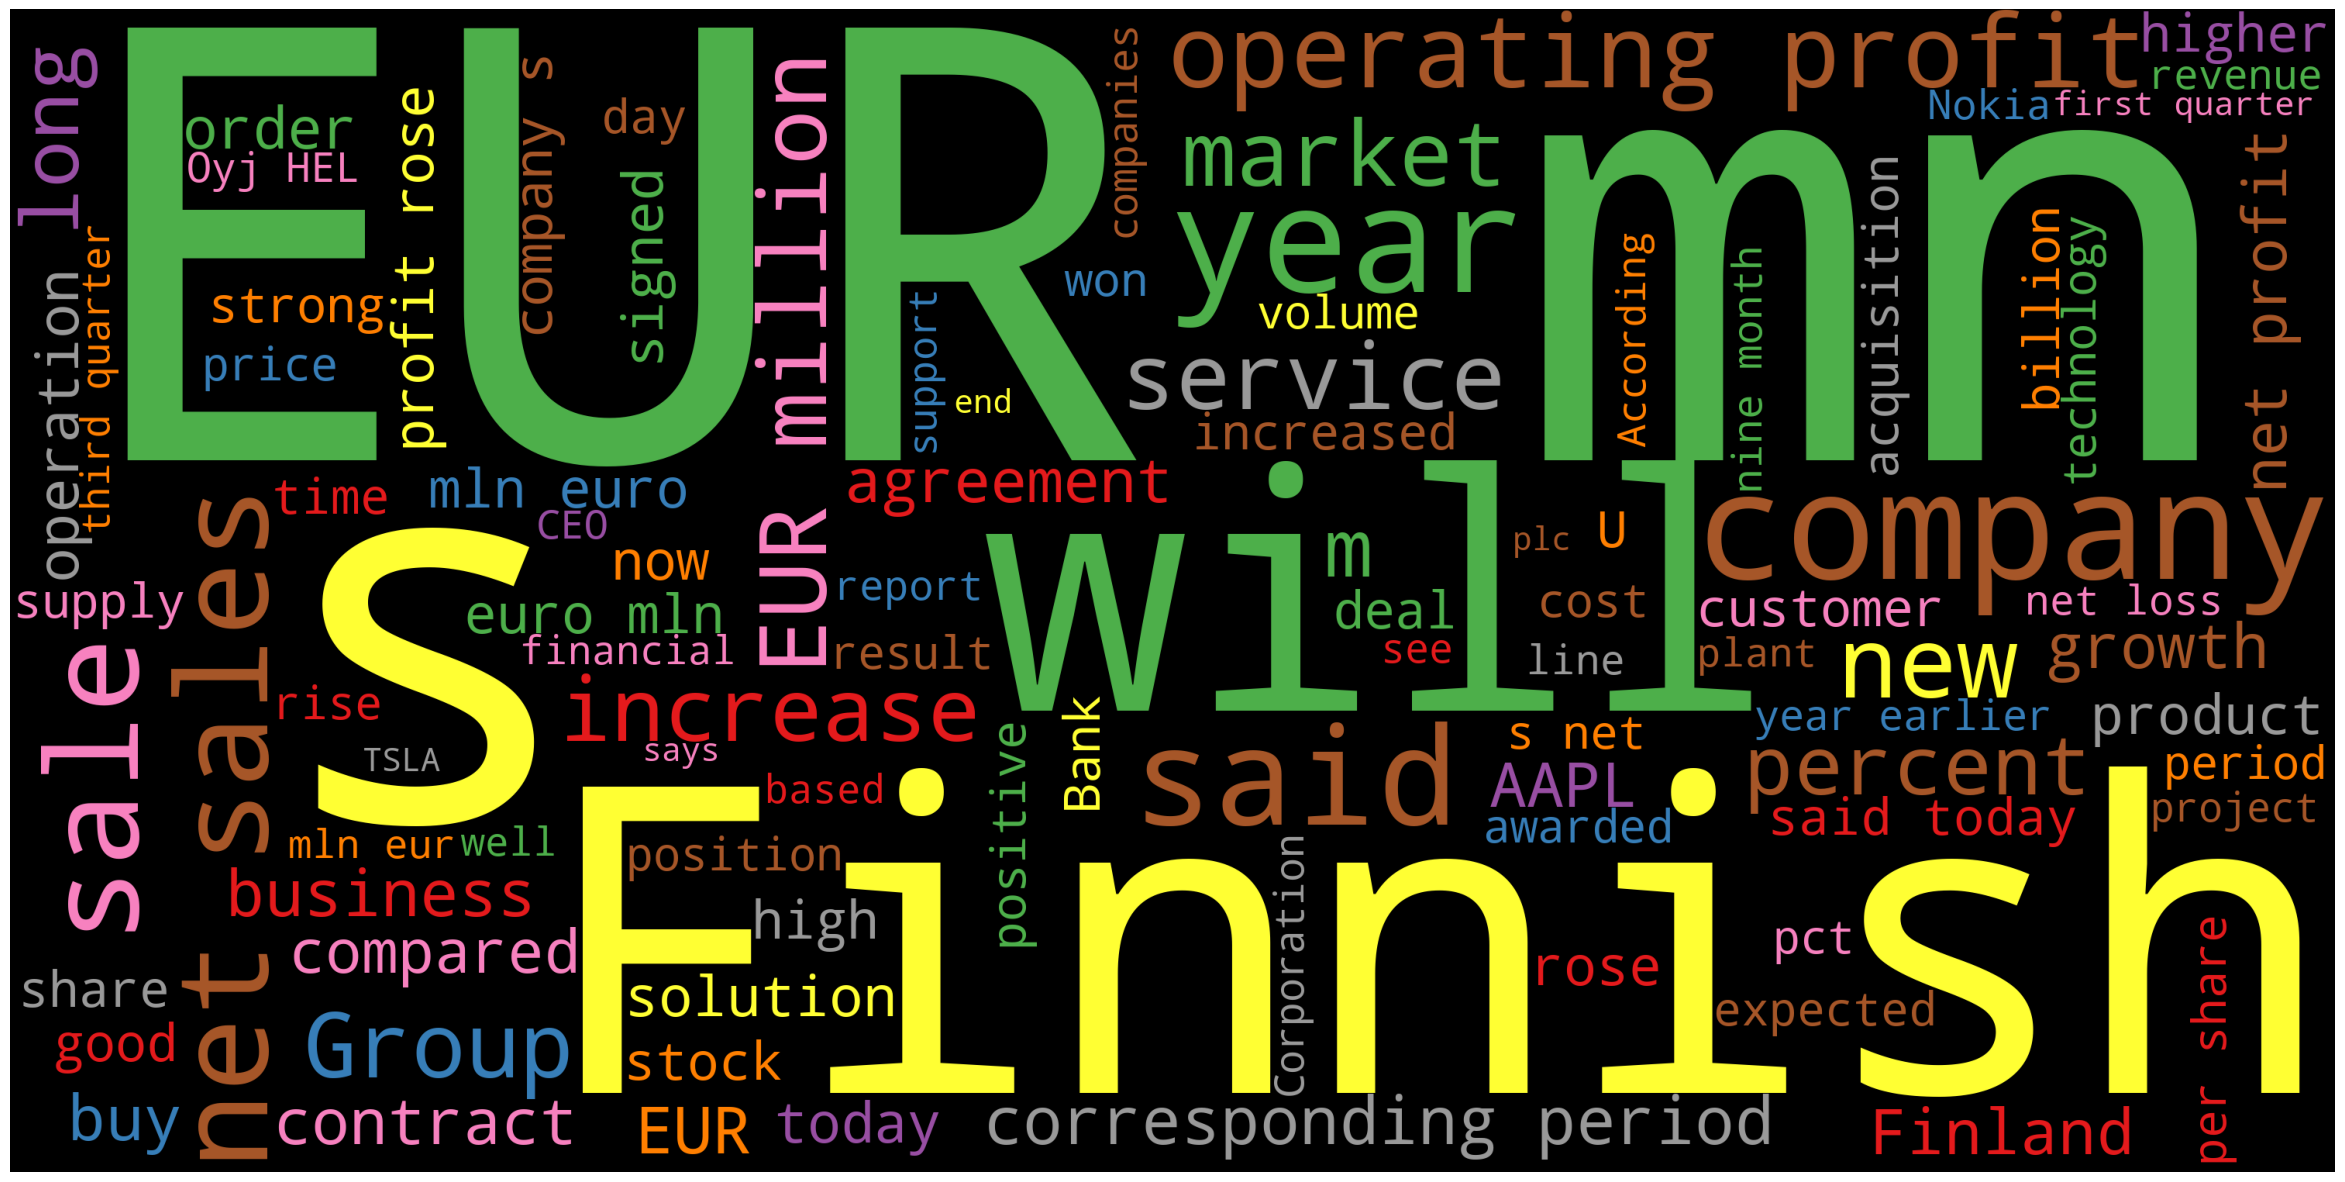

In [17]:
pos_wordcloud=WordCloud(width=3000,height=1500,background_color='black',max_words=100,
                   colormap='Set1').generate(' '.join(pos_words))
plot_cloud(pos_wordcloud)

# Mosting occuring words in positive reviews

In [18]:
pos_words.count('sales')

195

<AxesSubplot:>

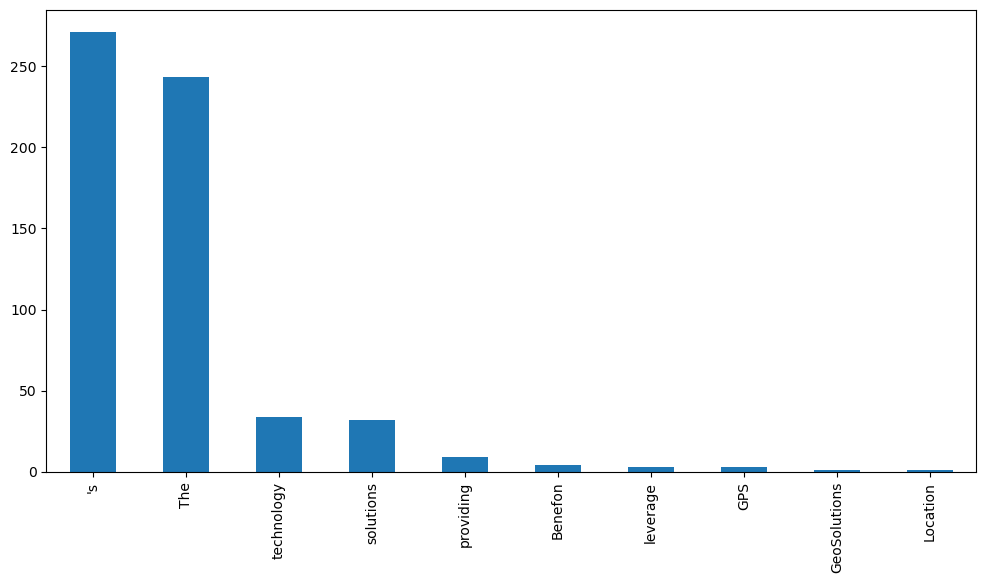

In [19]:
pos_count=defaultdict(int)

for char in pos_words:
    if char not in stop_words and char not in string.punctuation:
        
        pos_count[char]+=1
plt.figure(figsize=(12,6))   
pos_series=pd.Series(pos_count)
pos_series.head(10).sort_values(ascending=False).plot(kind='bar')

In [20]:
pos_series.sort_values(ascending=False)

EUR         384
's          271
The         243
mn          239
sales       195
           ... 
Adjusted      1
plus!         1
28%           1
amending      1
assets:       1
Length: 7645, dtype: int64

In [21]:
pos_count

defaultdict(int,
            {'The': 243,
             'GeoSolutions': 1,
             'technology': 34,
             'leverage': 3,
             'Benefon': 4,
             "'s": 271,
             'GPS': 3,
             'solutions': 32,
             'providing': 9,
             'Location': 1,
             'Based': 3,
             'Search': 1,
             'Technology': 9,
             'Communities': 1,
             'Platform': 1,
             'location': 2,
             'relevant': 2,
             'multimedia': 1,
             'content': 3,
             'new': 83,
             'powerful': 2,
             'commercial': 4,
             'model': 2,
             'For': 12,
             'last': 40,
             'quarter': 112,
             '2010': 103,
             'Componenta': 9,
             'net': 175,
             'sales': 195,
             'doubled': 6,
             'EUR131m': 1,
             'EUR76m': 1,
             'period': 140,
             'year': 141,
             'earlier': 34

# Unigrams-positive words

Text(0.5, 1.0, 'Top 30 unigrams in positive Reviews')

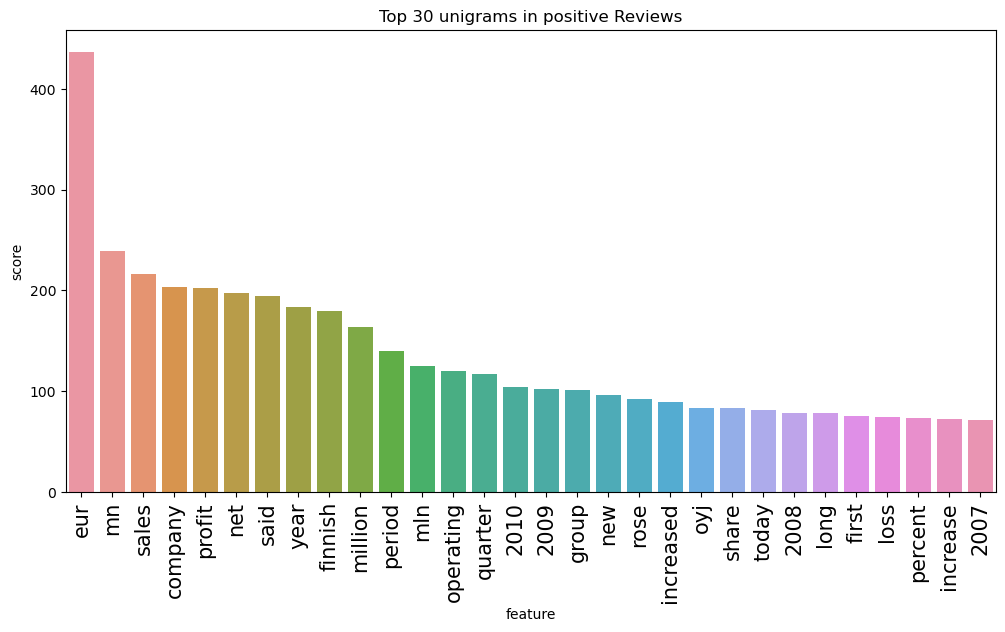

In [22]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

X = vectorizer.fit_transform(pos_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})


df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 unigrams in positive Reviews')

# Bigrams-positive words

Text(0.5, 1.0, 'Top 30 bigrams in positive Reviews')

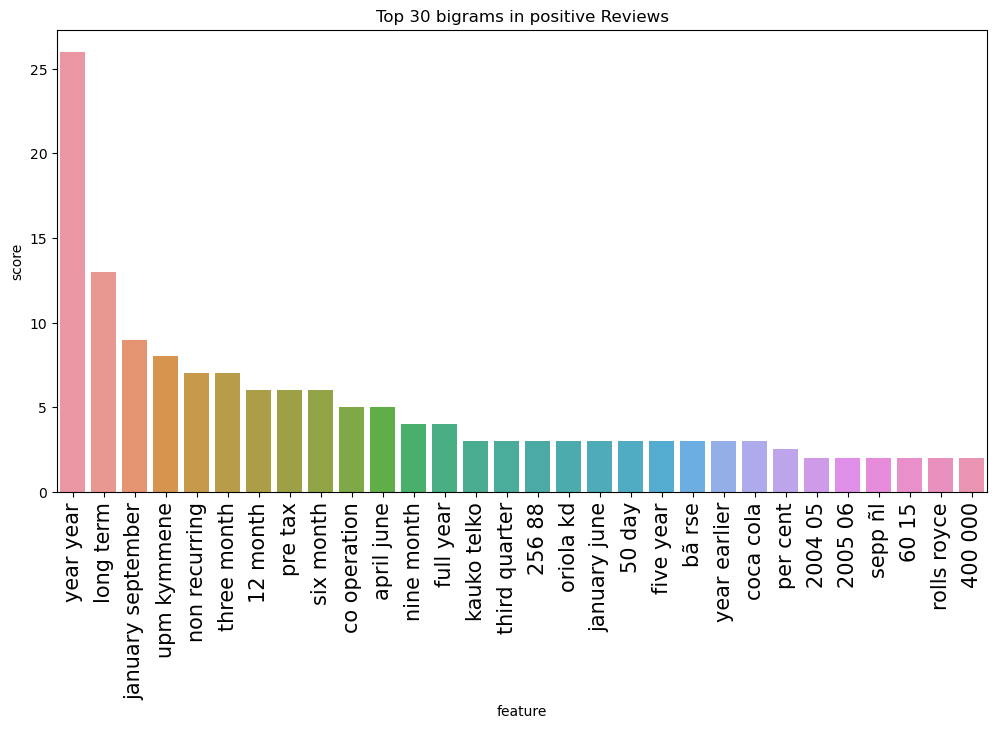

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)

X = vectorizer.fit_transform(pos_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})


df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 bigrams in positive Reviews')

# Trigrams-positive words

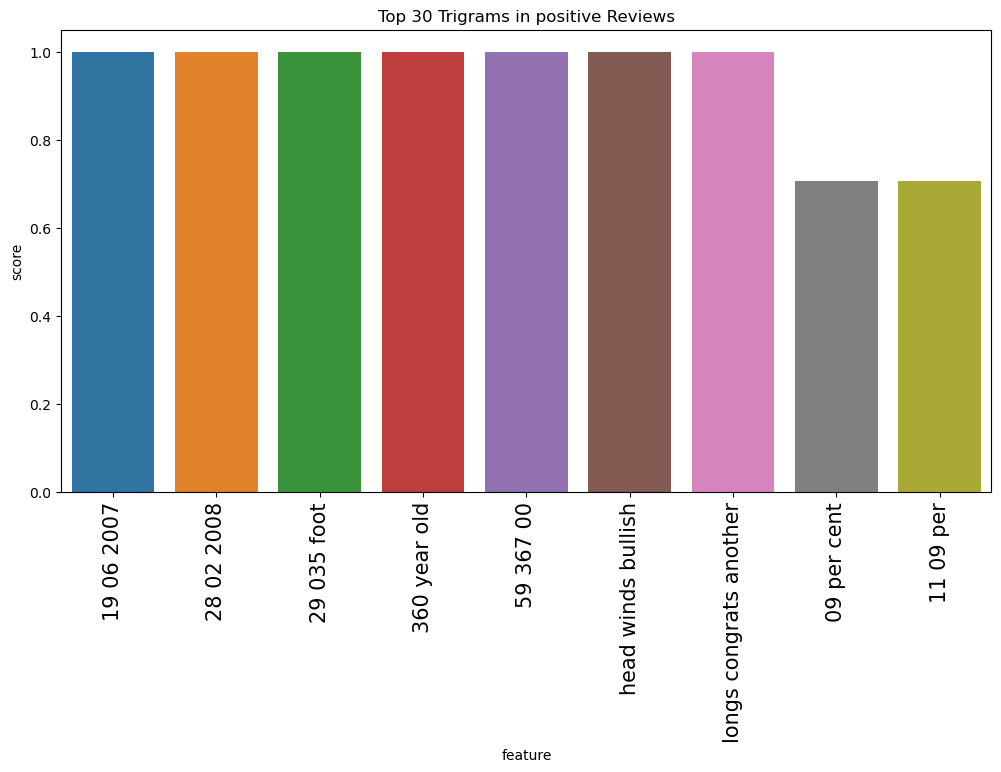

In [24]:
vectorizer = TfidfVectorizer(ngram_range=(3,3),stop_words=stop_words)

X = vectorizer.fit_transform(pos_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(5000)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 Trigrams in positive Reviews');

In [25]:
# # create document-term matrix
# vectorizer = CountVectorizer(stop_words='english')
# doc_term_matrix = vectorizer.fit_transform(pos_words)

# # calculate word co-occurrence matrix
# co_occurrence_matrix = (doc_term_matrix.T * doc_term_matrix).toarray()

# # create heatmap
# sns.heatmap(co_occurrence_matrix, xticklabels=vectorizer.get_feature_names(), yticklabels=vectorizer.get_feature_names())
# plt.title('Word Co-occurrence in Reviews')
# plt.show()


# Analysing on Negative words

In [26]:
import re

def remove_url(text):
    
    text = re.sub(r'http\S+', '', text)
    
    text = re.sub(r'www\S+', '', text)
    
    return text

for i in range(len(neg_words)):
    neg_words[i] = remove_url(neg_words[i])


In [27]:
neg_words

['$ESI',
 'on',
 'lows,',
 'down',
 '$1.50',
 'to',
 '$2.50',
 'BK',
 'a',
 'real',
 'possibility',
 "Shell's",
 '$70',
 'Billion',
 'BG',
 'Deal',
 'Meets',
 'Shareholder',
 'Skepticism',
 'SSH',
 'COMMUNICATIONS',
 'SECURITY',
 'CORP',
 'STOCK',
 'EXCHANGE',
 'RELEASE',
 'OCTOBER',
 '14',
 ',',
 '2008',
 'AT',
 '2:45',
 'PM',
 'The',
 'Company',
 'updates',
 'its',
 'full',
 'year',
 'outlook',
 'and',
 'estimates',
 'its',
 'results',
 'to',
 'remain',
 'at',
 'loss',
 'for',
 'the',
 'full',
 'year',
 '.',
 '$SAP',
 'Q1',
 'disappoints',
 'as',
 '#software',
 'licenses',
 'down.',
 'Real',
 'problem?',
 '#Cloud',
 'growth',
 'trails',
 '$MSFT',
 '$ORCL',
 '$GOOG',
 '$CRM',
 '$ADBE',
 '',
 '$AAPL',
 'afternoon',
 'selloff',
 'as',
 'usual',
 'will',
 'be',
 'brutal.',
 'get',
 'ready',
 'to',
 'lose',
 'a',
 'ton',
 'of',
 'money.',
 '$TSLA',
 'recalling',
 'pretty',
 'much',
 'every',
 'single',
 'model',
 'X',
 '@cnnbrk',
 'got',
 'to',
 'short',
 'that',
 'even',
 'at',
 'work',


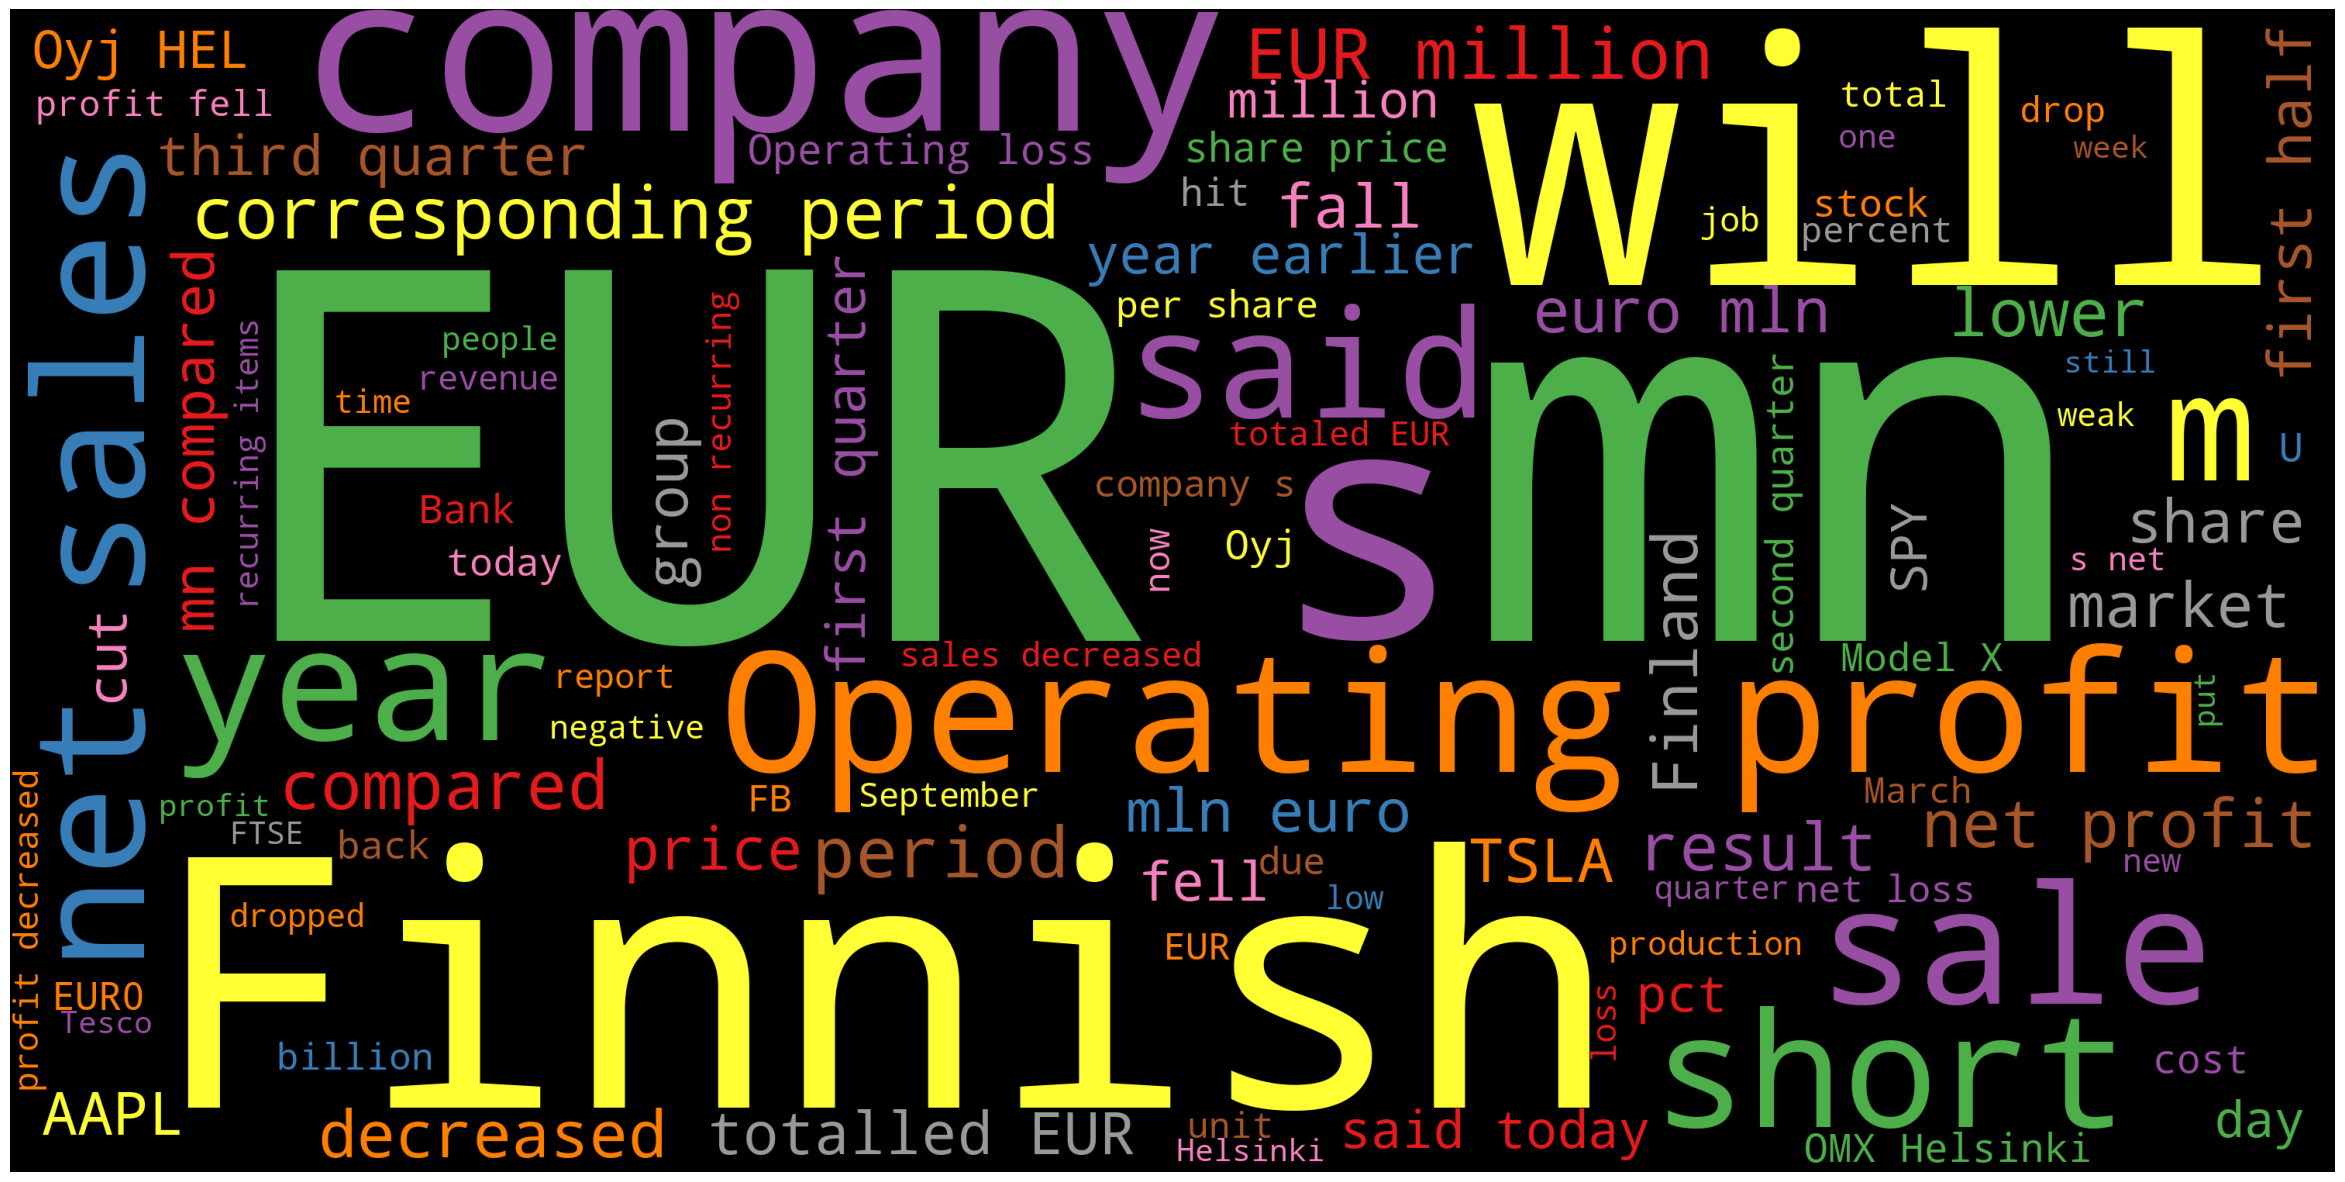

In [28]:
neg_wordcloud=WordCloud(width=3000,height=1500,background_color='black',max_words=100,
                   colormap='Set1').generate(' '.join(neg_words))
plot_cloud(neg_wordcloud)

# Unigrams-Negative reviews

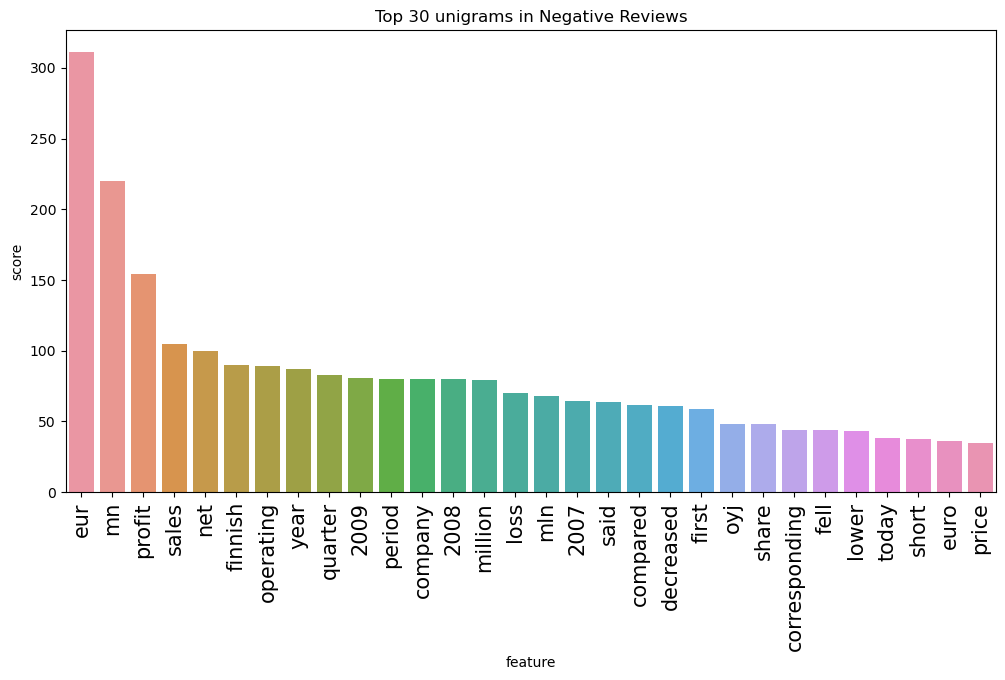

In [29]:
vectorizer=TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

X=vectorizer.fit_transform(neg_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 unigrams in Negative Reviews');

# Bigrams-Negative reviews

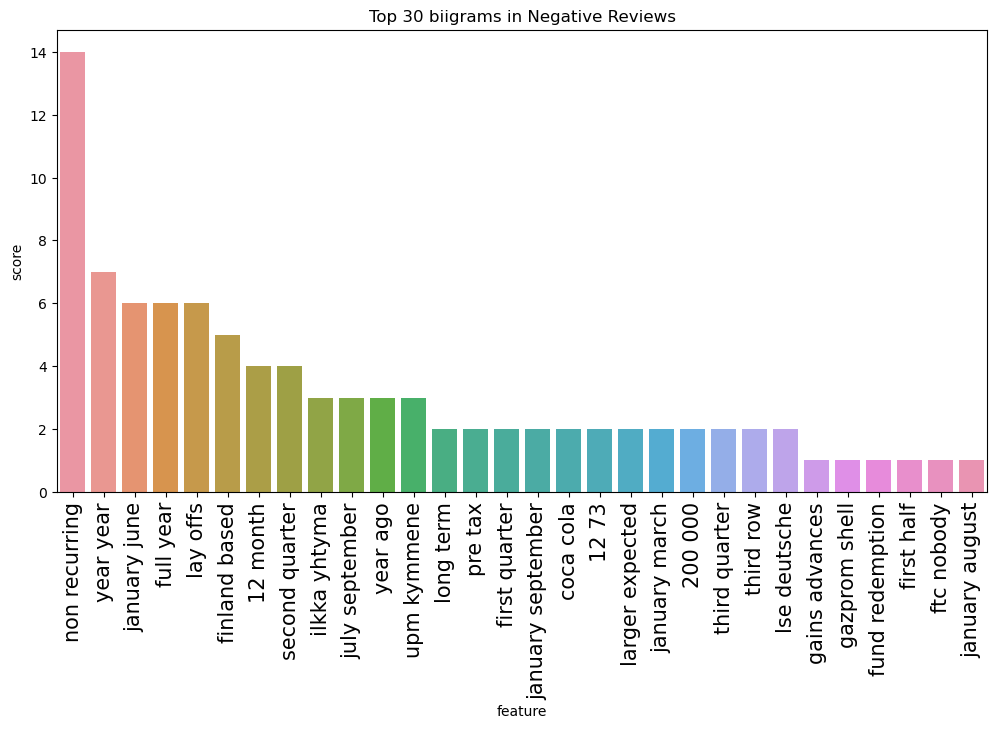

In [30]:
vectorizer=TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)

X=vectorizer.fit_transform(neg_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 biigrams in Negative Reviews');

In [31]:
neg_words

['$ESI',
 'on',
 'lows,',
 'down',
 '$1.50',
 'to',
 '$2.50',
 'BK',
 'a',
 'real',
 'possibility',
 "Shell's",
 '$70',
 'Billion',
 'BG',
 'Deal',
 'Meets',
 'Shareholder',
 'Skepticism',
 'SSH',
 'COMMUNICATIONS',
 'SECURITY',
 'CORP',
 'STOCK',
 'EXCHANGE',
 'RELEASE',
 'OCTOBER',
 '14',
 ',',
 '2008',
 'AT',
 '2:45',
 'PM',
 'The',
 'Company',
 'updates',
 'its',
 'full',
 'year',
 'outlook',
 'and',
 'estimates',
 'its',
 'results',
 'to',
 'remain',
 'at',
 'loss',
 'for',
 'the',
 'full',
 'year',
 '.',
 '$SAP',
 'Q1',
 'disappoints',
 'as',
 '#software',
 'licenses',
 'down.',
 'Real',
 'problem?',
 '#Cloud',
 'growth',
 'trails',
 '$MSFT',
 '$ORCL',
 '$GOOG',
 '$CRM',
 '$ADBE',
 '',
 '$AAPL',
 'afternoon',
 'selloff',
 'as',
 'usual',
 'will',
 'be',
 'brutal.',
 'get',
 'ready',
 'to',
 'lose',
 'a',
 'ton',
 'of',
 'money.',
 '$TSLA',
 'recalling',
 'pretty',
 'much',
 'every',
 'single',
 'model',
 'X',
 '@cnnbrk',
 'got',
 'to',
 'short',
 'that',
 'even',
 'at',
 'work',


# Mosting occuring words in negative reviews

<AxesSubplot:>

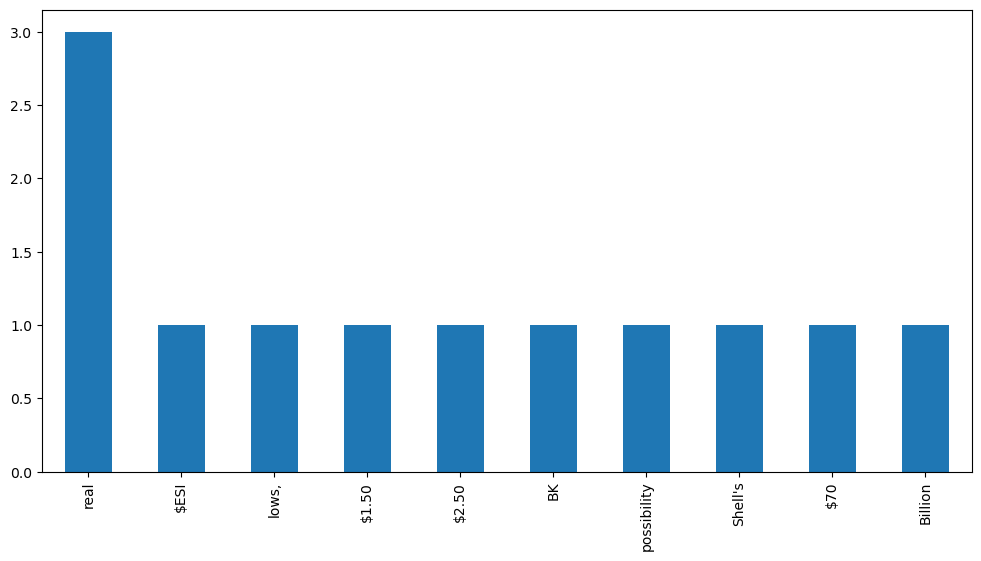

In [32]:
neg_count=defaultdict(int)

for char in neg_words:
    if char not in (stop_words or string.punctuation):
        
        neg_count[char]+=1
        
plt.figure(figsize=(12,6))   
pos_series=pd.Series(neg_count)
pos_series.head(10).sort_values(ascending=False).plot(kind='bar')

# Analysing on Neutral Reviews

In [33]:
import re

def remove_url(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    text = re.sub(r'www\S+', '', text)
    
    return text


for i in range(len(neu_words)):
    neu_words[i] = remove_url(neu_words[i])


In [34]:
neu_words

['According',
 'to',
 'the',
 'Finnish-Russian',
 'Chamber',
 'of',
 'Commerce',
 ',',
 'all',
 'the',
 'major',
 'construction',
 'companies',
 'of',
 'Finland',
 'are',
 'operating',
 'in',
 'Russia',
 '.',
 'The',
 'Swedish',
 'buyout',
 'firm',
 'has',
 'sold',
 'its',
 'remaining',
 '22.4',
 'percent',
 'stake',
 ',',
 'almost',
 'eighteen',
 'months',
 'after',
 'taking',
 'the',
 'company',
 'public',
 'in',
 'Finland',
 '.',
 'The',
 'Stockmann',
 'department',
 'store',
 'will',
 'have',
 'a',
 'total',
 'floor',
 'space',
 'of',
 'over',
 '8,000',
 'square',
 'metres',
 'and',
 'Stockmann',
 "'s",
 'investment',
 'in',
 'the',
 'project',
 'will',
 'have',
 'a',
 'price',
 'tag',
 'of',
 'about',
 'EUR',
 '12',
 'million',
 '.',
 'Viking',
 'Line',
 'has',
 'canceled',
 'some',
 'services',
 '.',
 'Ahlstrom',
 'Corporation',
 'STOCK',
 'EXCHANGE',
 'ANNOUNCEMENT',
 '7.2.2007',
 'at',
 '10.30',
 'A',
 'total',
 'of',
 '56,955',
 'new',
 'shares',
 'of',
 'Ahlstrom',
 'Corporat

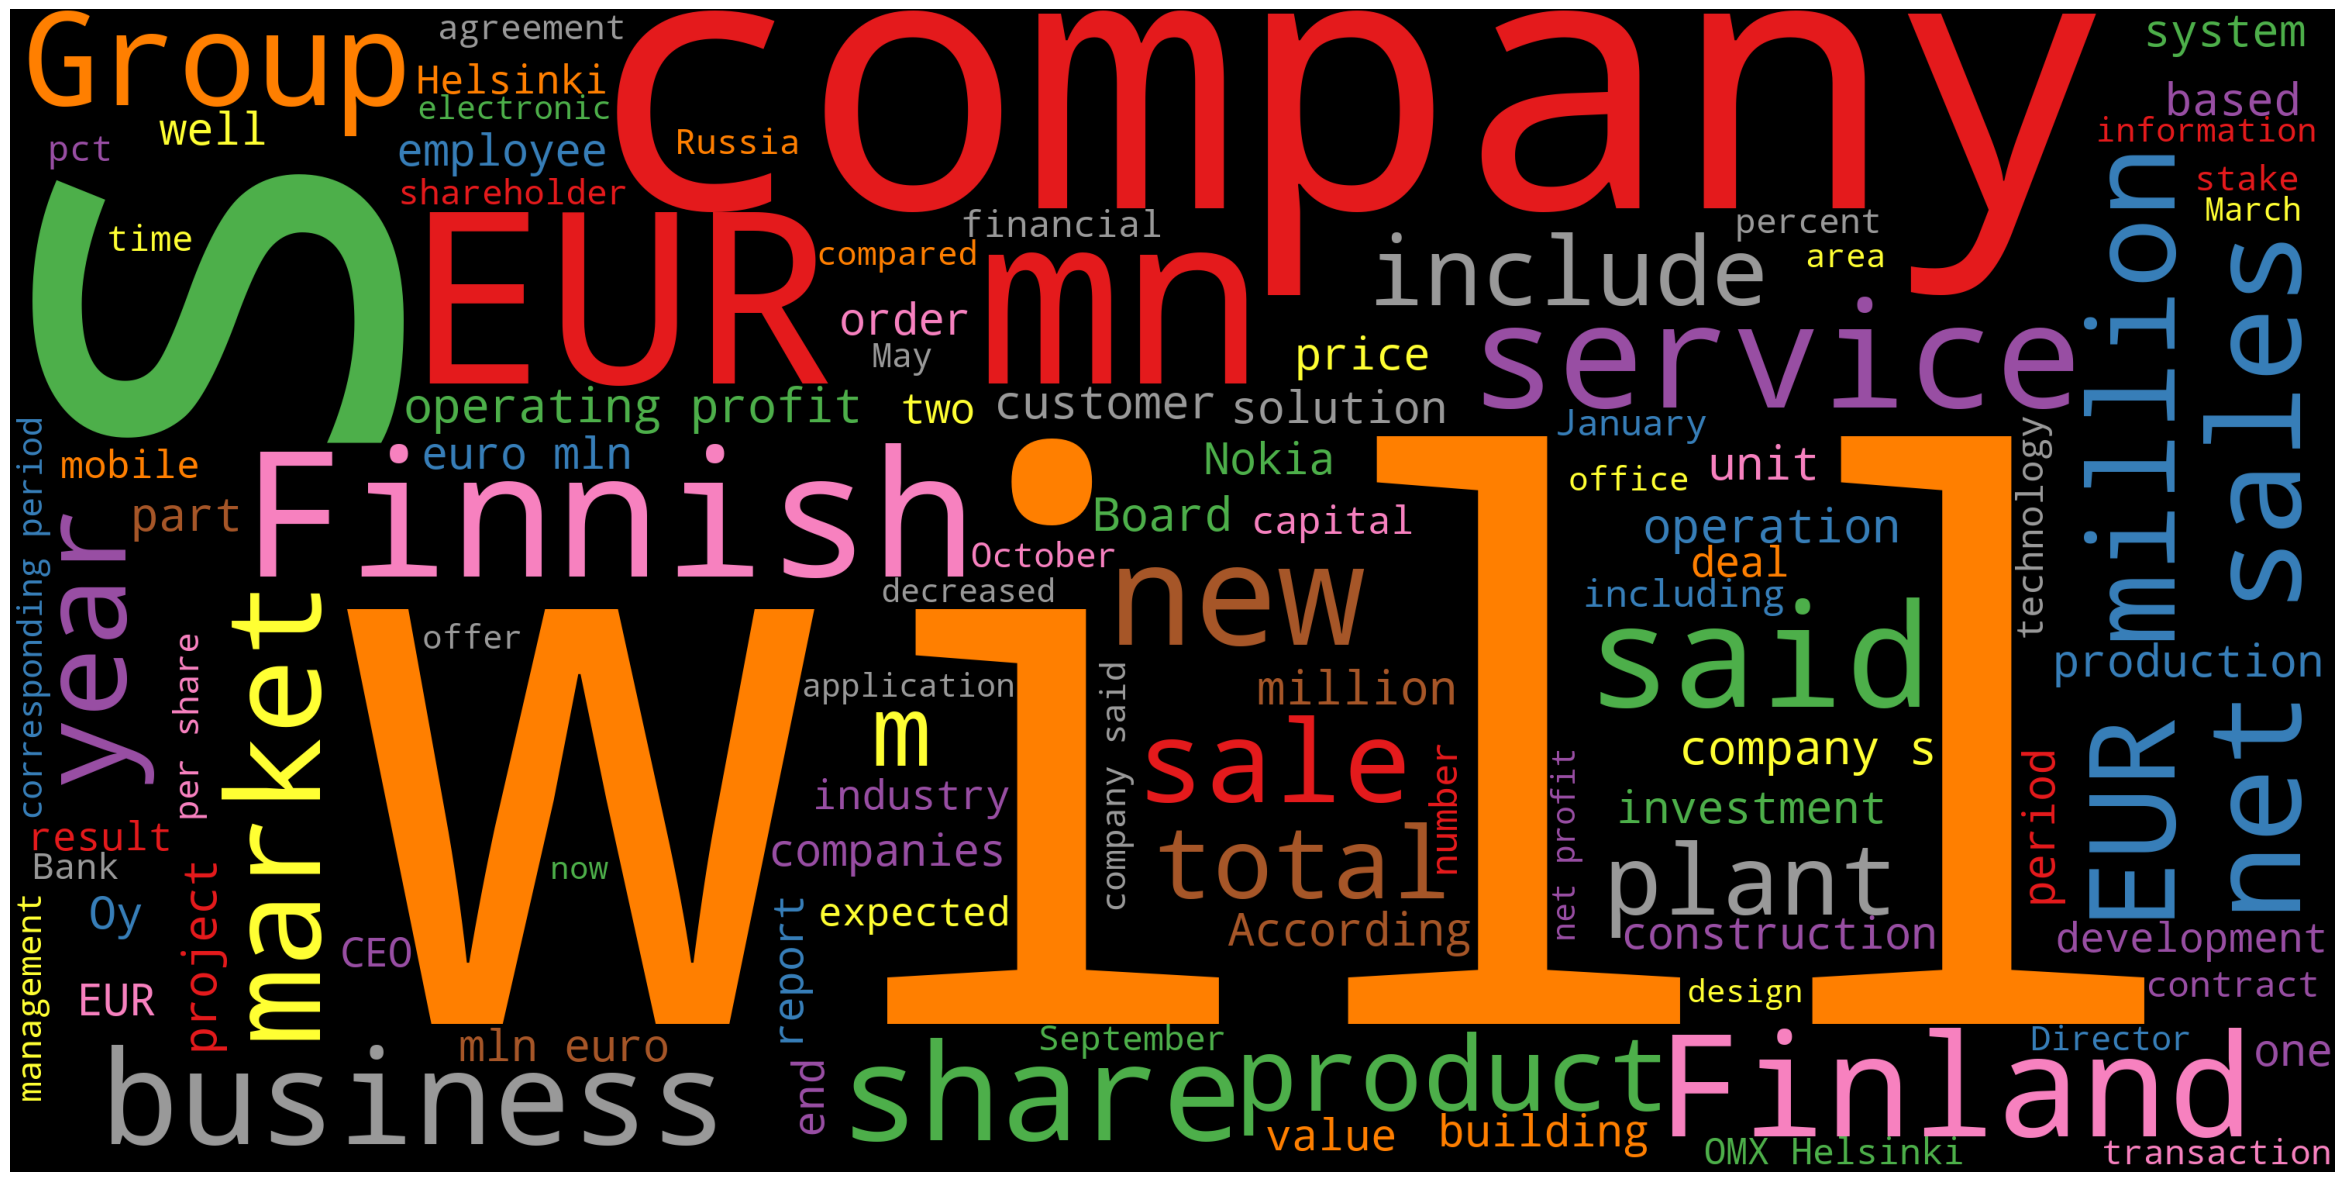

In [35]:
neu_wordcloud=WordCloud(width=3000,height=1500,background_color='black',max_words=100,
                   colormap='Set1').generate(' '.join(neu_words))
plot_cloud(neu_wordcloud)

# Unigrams-Neutral Reviews

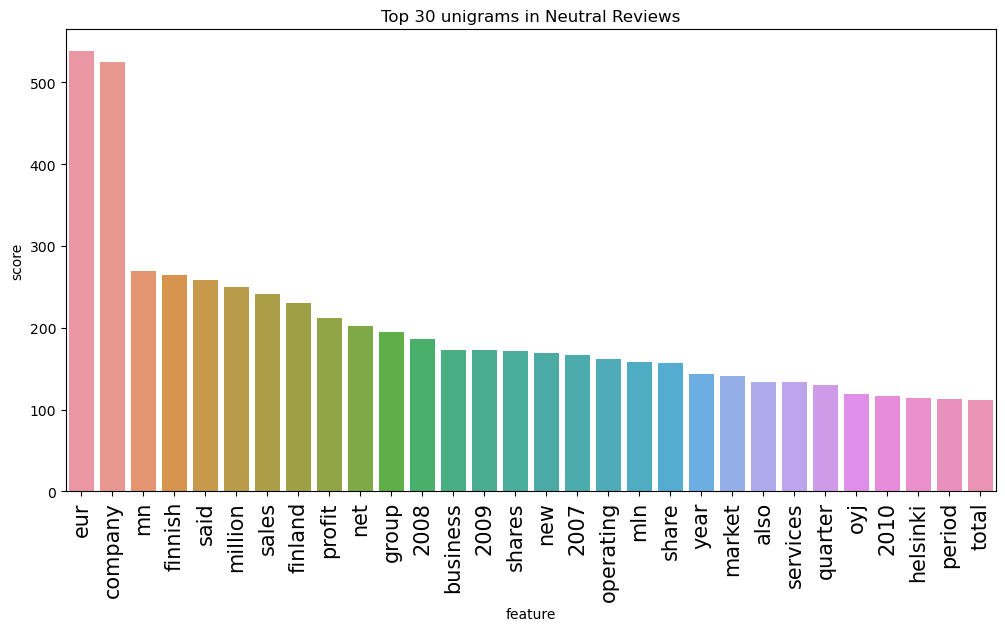

In [36]:
vectorizer=TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

X=vectorizer.fit_transform(neu_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 unigrams in Neutral Reviews');

# bigrams-Neutral Reviews

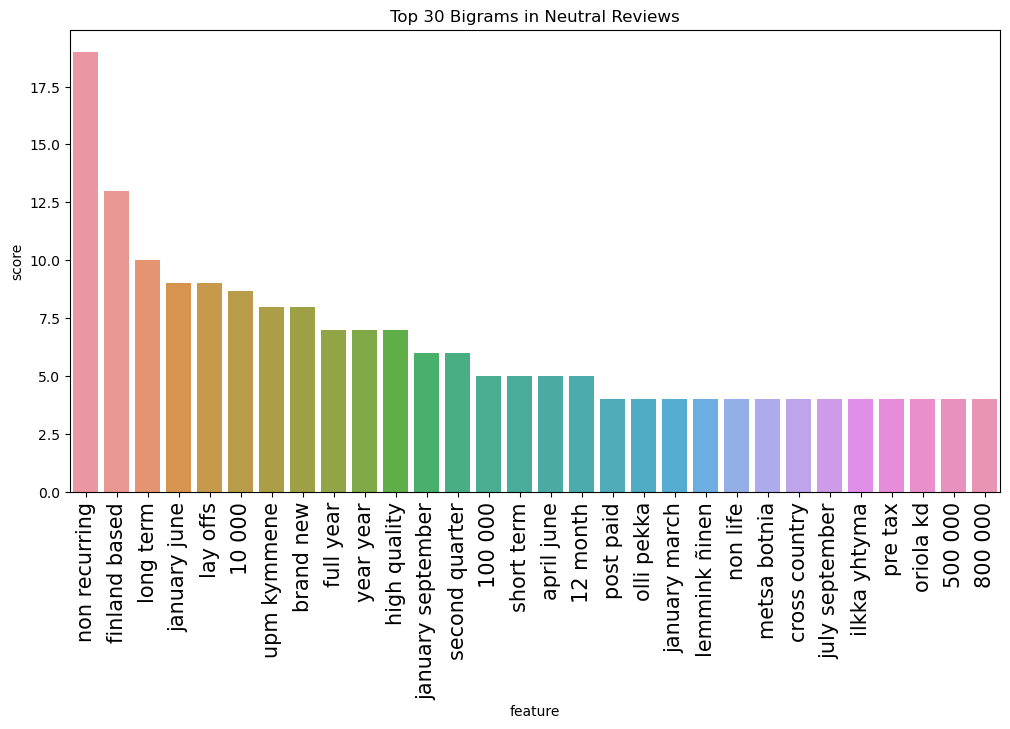

In [37]:
vectorizer=TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)

X=vectorizer.fit_transform(neu_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 Bigrams in Neutral Reviews');

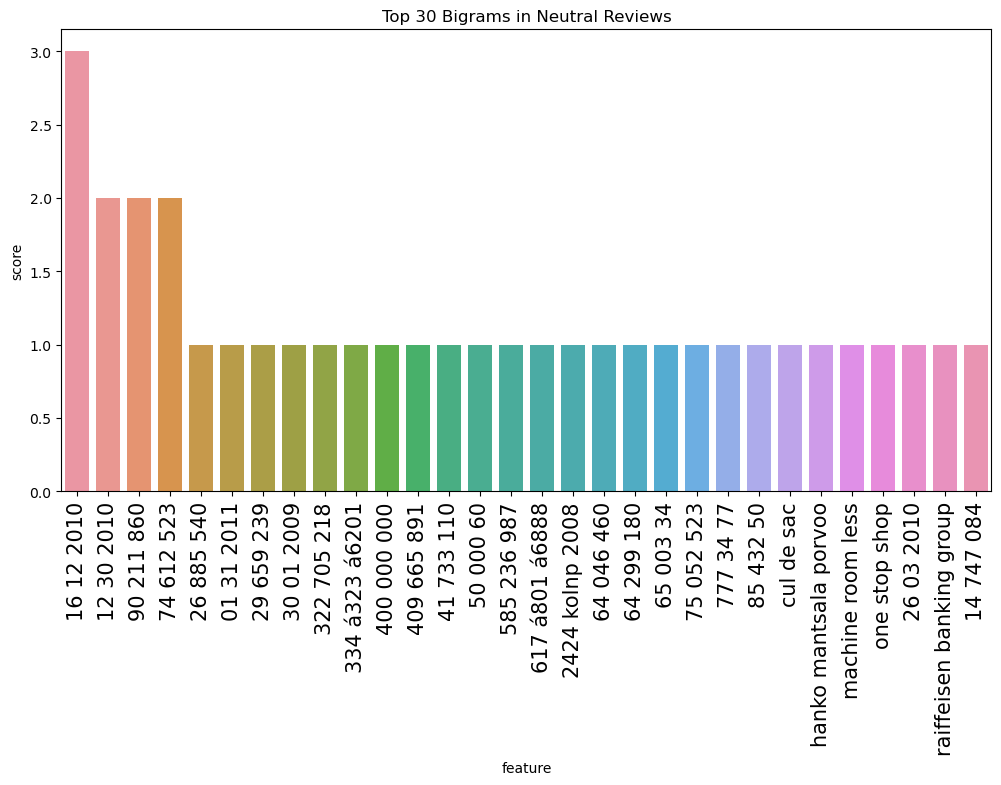

In [38]:
vectorizer=TfidfVectorizer(ngram_range=(3,3),stop_words=stop_words)

X=vectorizer.fit_transform(neu_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 Bigrams in Neutral Reviews');

# Mosting occuring words in neutral reviews

<AxesSubplot:>

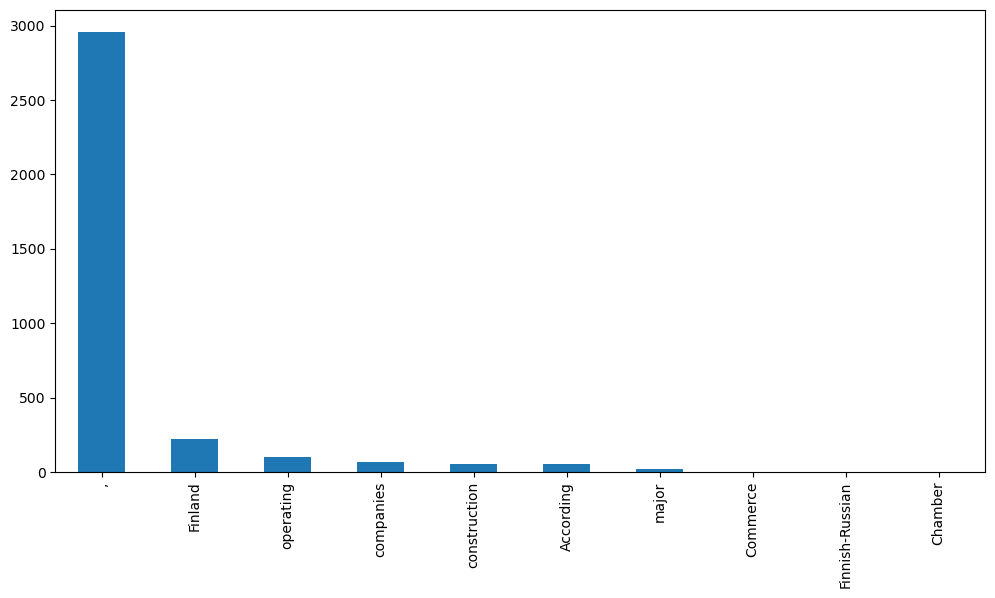

In [39]:
neu_count=defaultdict(int)

for char in neu_words:
    if char not in (stop_words or string.punctuation):
        
        neu_count[char]+=1

plt.figure(figsize=(12,6))
pos_series=pd.Series(neu_count)
pos_series.head(10).sort_values(ascending=False).plot(kind='bar')

# Length of reviews

In [40]:
df1=df.copy()

In [41]:
df1['length']=df1['Sentence'].apply(len)

array([[<AxesSubplot:title={'center':'negative'}>,
        <AxesSubplot:title={'center':'neutral'}>],
       [<AxesSubplot:title={'center':'positive'}>, <AxesSubplot:>]],
      dtype=object)

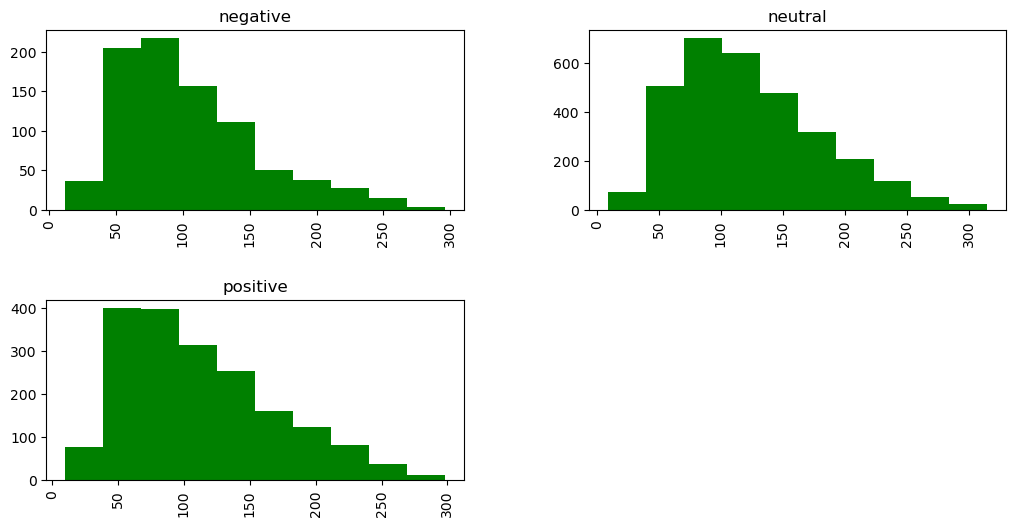

In [42]:
df1['length'].hist(by=df1['Sentiment'], figsize=(12,6), bins=10,color='green')

# Descriptive statistics for the reviews having positive,negative,neutral sentiment

In [43]:
(df1[df1['Sentiment']=='positive']['length']).describe()

count    1852.000000
mean      112.157127
std        56.412443
min        10.000000
25%        67.000000
50%       100.000000
75%       145.250000
max       298.000000
Name: length, dtype: float64

In [44]:
(df1[df1['Sentiment']=='negative']['length']).describe()

count    860.000000
mean     105.330233
std       51.798956
min       12.000000
25%       66.000000
50%       94.000000
75%      132.250000
max      296.000000
Name: length, dtype: float64

In [45]:
(df1[df1['Sentiment']=='neutral']['length']).describe()

count    3124.000000
mean      123.017606
std        56.695642
min         9.000000
25%        79.000000
50%       114.000000
75%       158.000000
max       315.000000
Name: length, dtype: float64

# Most commonly occured words in all reviews

In [46]:
freq_word=df1[df1.duplicated(subset='Sentence')]
freq_word

Sentence Sentiment  length
266   Finnish GeoSentric 's net sales decreased to E...   neutral      80
283   Sales in Finland decreased by 10.5 % in Januar...  negative      95
349   Full-year operating result for 2008 was 3.6 mi...  negative      62
387   Making matters more difficult , the company sa...  negative     180
496   Antti Orkola , president of Kemira GrowHow 's ...  negative     215
...                                                 ...       ...     ...
5827  ( ADPnews ) - Oct 21 , 2009 - Finland-based IT...  negative     231
5831  Finnish developer and manufacturer of mobile p...  negative     160
5832  Operating profit fell to EUR 38.1 mn from EUR ...  negative      63
5837  RISING costs have forced packaging producer Hu...  negative     107
5840  In the building and home improvement trade , s...   neutral      88

[514 rows x 3 columns]

In [47]:
df1['Sentence']

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5836, dtype: object

In [48]:
dup_words=' '.join(df['Sentence']).lower()
dup_words1=dup_words.split()
dup_words1

['the',
 'geosolutions',
 'technology',
 'will',
 'leverage',
 'benefon',
 "'s",
 'gps',
 'solutions',
 'by',
 'providing',
 'location',
 'based',
 'search',
 'technology',
 ',',
 'a',
 'communities',
 'platform',
 ',',
 'location',
 'relevant',
 'multimedia',
 'content',
 'and',
 'a',
 'new',
 'and',
 'powerful',
 'commercial',
 'model',
 '.',
 '$esi',
 'on',
 'lows,',
 'down',
 '$1.50',
 'to',
 '$2.50',
 'bk',
 'a',
 'real',
 'possibility',
 'for',
 'the',
 'last',
 'quarter',
 'of',
 '2010',
 ',',
 'componenta',
 "'s",
 'net',
 'sales',
 'doubled',
 'to',
 'eur131m',
 'from',
 'eur76m',
 'for',
 'the',
 'same',
 'period',
 'a',
 'year',
 'earlier',
 ',',
 'while',
 'it',
 'moved',
 'to',
 'a',
 'zero',
 'pre-tax',
 'profit',
 'from',
 'a',
 'pre-tax',
 'loss',
 'of',
 'eur7m',
 '.',
 'according',
 'to',
 'the',
 'finnish-russian',
 'chamber',
 'of',
 'commerce',
 ',',
 'all',
 'the',
 'major',
 'construction',
 'companies',
 'of',
 'finland',
 'are',
 'operating',
 'in',
 'russia',


In [49]:
word_count=defaultdict(int)

for i in dup_words1:
    if i not in stop_words and i not in string.punctuation and i!="'s":
        word_count[i]+=1

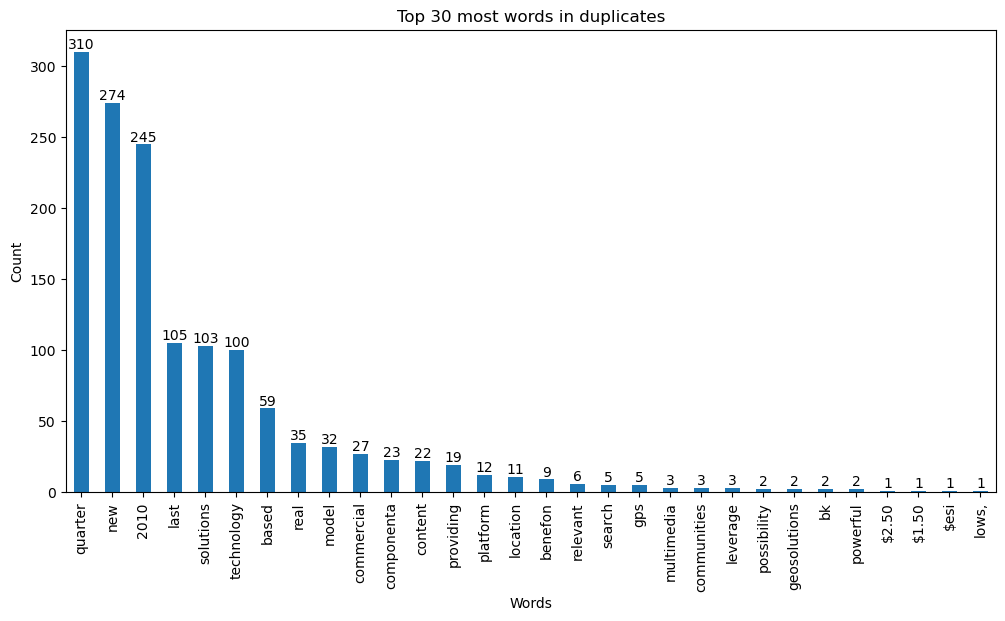

In [50]:
fig=plt.figure(figsize=(12,6))
word_cnt_series=pd.Series(word_count)
top_words = word_cnt_series.head(30).sort_values(ascending=False)
top_words.plot(kind='bar')

for i, j in enumerate(top_words):
    plt.text(i, j, str(j), ha='center', va='bottom')
    
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 most words in duplicates')
plt.show()


# Will check the most common unigrams in positive,negative,neutral reviews by preprocess the text

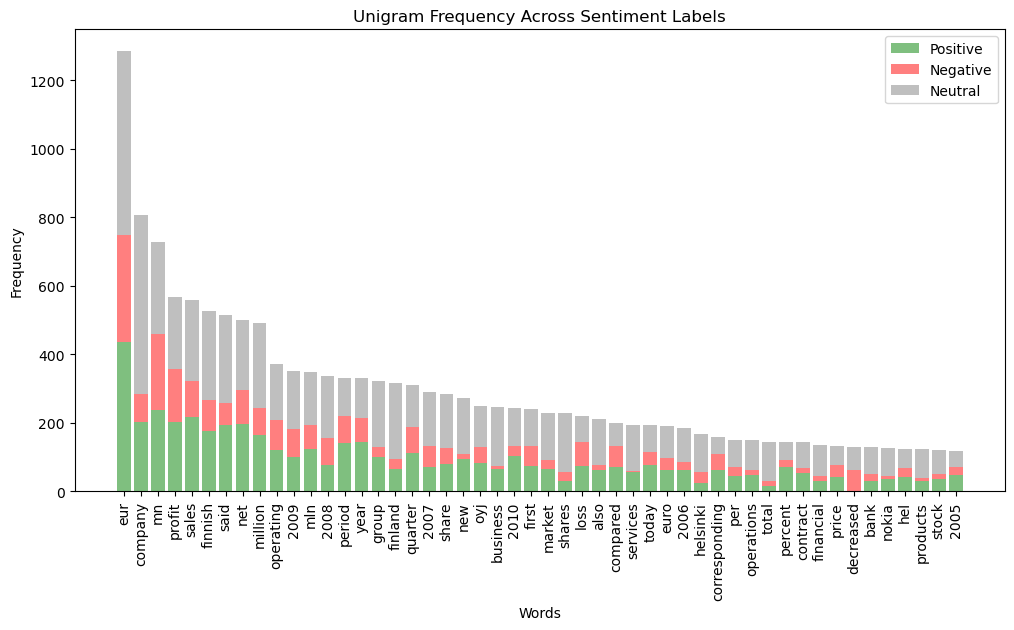

In [51]:
def preprocess(text):
    
    text=text.lower()
    
    text=text.translate(str.maketrans('','',string.punctuation))
    
    stop_words = set(stopwords.words('english'))
    
    text=' '.join(word for word in text.split() if word not in stop_words)
    
    return text

df1['Tokens']=df1['Sentence'].apply(lambda x:preprocess(x).split())

from collections import Counter

pos_words=Counter()
neg_words=Counter()
neu_words=Counter()

for i,row in df1.iterrows():
    tokens=row['Tokens']
    sentiment=row['Sentiment']
    if sentiment=='positive':
        pos_words.update(tokens)
    elif sentiment=='negative':
        neg_words.update(tokens)
    elif sentiment=='neutral':
        neu_words.update(tokens)
        

common_words_uni= set(pos_words.keys()) & set(neg_words.keys()) & set(neu_words.keys())

top50_common_words=[x for x in sorted(common_words_uni,key=lambda x:pos_words[x]+neg_words[x]+neu_words[x],reverse=True)[:50]]

fig, ax = plt.subplots(figsize=(12, 6))

for word in top50_common_words:
    pos_count=pos_words[word]
    neg_count=neg_words[word]
    neu_count=neu_words[word]
    ax.bar(word, pos_count, color='green', alpha=0.5)
    ax.bar(word, neg_count, color='red', alpha=0.5, bottom=pos_count)
    ax.bar(word, neu_count, color='grey', alpha=0.5, bottom=pos_count+neg_count)
    
ax.set_xlabel('Words')
ax.set_xticklabels(top50_common_words, rotation=90)
ax.set_ylabel('Frequency')
ax.set_title('Unigram Frequency Across Sentiment Labels')

# Add legend
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show plot
plt.show()
   

### Removing stop words and high-frequency words can help improve the accuracy of your sentiment analysis model by reducing noise and focusing on the more informative words. However, it's also important to balance this with preserving some context and nuance in the text, as removing too many words can lead to oversimplification and loss of important information

# Will check the most common bigrams in positive,negative,neutral reviews by preprocess the text

In [52]:
from nltk import ngrams

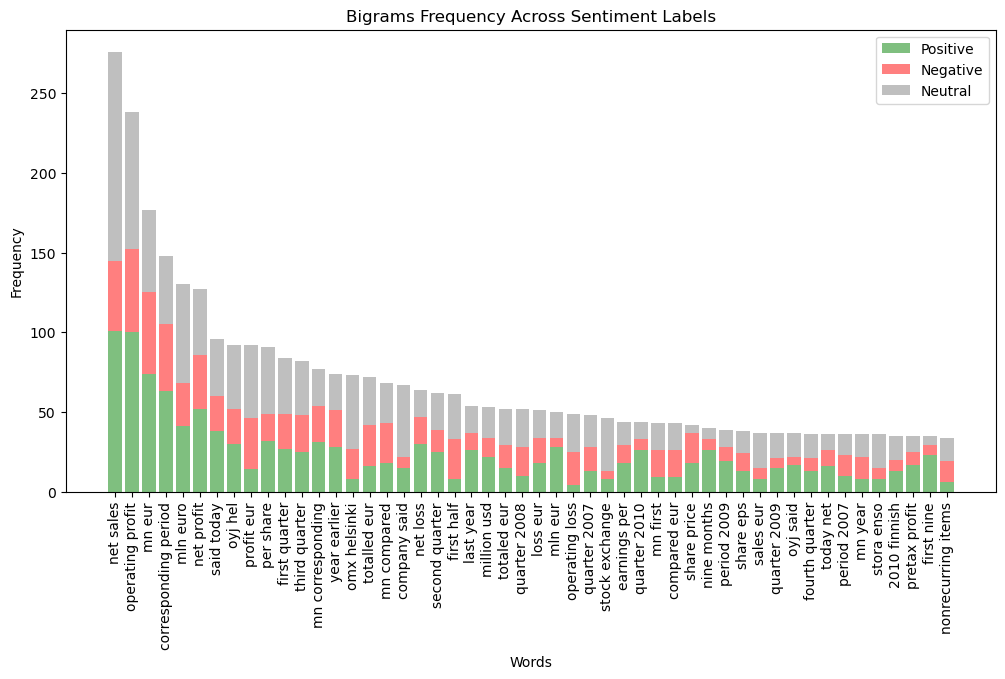

In [53]:
def preprocess(text):
    
    text=text.lower()
    
    text=text.translate(str.maketrans('','',string.punctuation))
    
    stop_words = set(stopwords.words('english'))
    
    text=' '.join(word for word in text.split() if word not in stop_words)
    
    n_grams = ngrams(text.split(), 2)
    
    n_grams_list = [" ".join(grams) for grams in n_grams]
    
    return n_grams_list

df1['Bigrams']=df1['Sentence'].apply(lambda x:preprocess(x))

from collections import Counter

pos_words=Counter()
neg_words=Counter()
neu_words=Counter()

for i,row in df1.iterrows():
    bigrams=row['Bigrams']
    sentiment=row['Sentiment']
    if sentiment=='positive':
        pos_words.update(bigrams)
    elif sentiment=='negative':
        neg_words.update(bigrams)
    elif sentiment=='neutral':
        neu_words.update(bigrams)
        

common_words_bi = set(pos_words.keys()) & set(neg_words.keys()) & set(neu_words.keys())

top50_common_words=[x for x in sorted(common_words_bi,key=lambda x:pos_words[x]+neg_words[x]+neu_words[x],reverse=True)[:50]]

fig, ax = plt.subplots(figsize=(12, 6))

for word in top50_common_words:
    pos_count=pos_words[word]
    neg_count=neg_words[word]
    neu_count=neu_words[word]
    ax.bar(word, pos_count, color='green', alpha=0.5)
    ax.bar(word, neg_count, color='red', alpha=0.5, bottom=pos_count)
    ax.bar(word, neu_count, color='grey', alpha=0.5, bottom=pos_count+neg_count)
    
ax.set_xlabel('Words')
ax.set_xticklabels(top50_common_words, rotation=90)
ax.set_ylabel('Frequency')
ax.set_title('Bigrams Frequency Across Sentiment Labels')

# Add legend
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show plot
plt.show()
   

# Will check the most common Trigrams in positive,negative,neutral reviews by preprocess the text

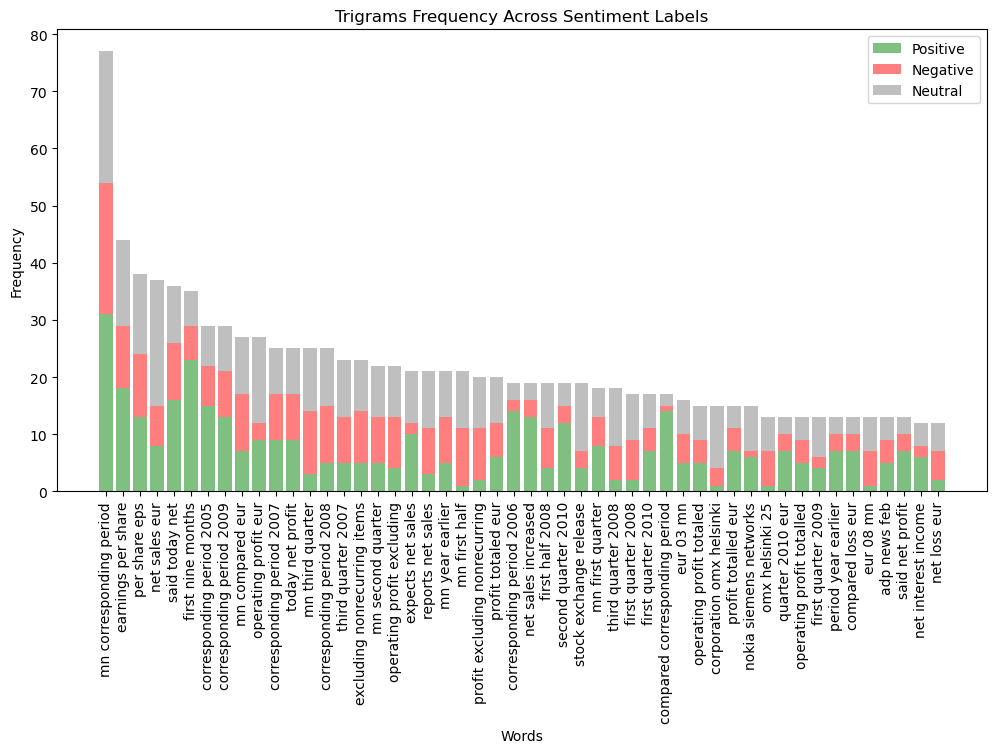

In [54]:
def preprocess(text):
    
    text=text.lower()
    
    text=text.translate(str.maketrans('','',string.punctuation))
    
    stop_words = set(stopwords.words('english'))
    
    text=' '.join(word for word in text.split() if word not in stop_words)
    
    n_grams = ngrams(text.split(), 3)
    
    n_grams_list = [" ".join(grams) for grams in n_grams]
    
    return n_grams_list

df1['Trigrams']=df1['Sentence'].apply(lambda x:preprocess(x))

from collections import Counter

pos_words=Counter()
neg_words=Counter()
neu_words=Counter()

for i,row in df1.iterrows():
    trigram=row['Trigrams']
    sentiment=row['Sentiment']
    if sentiment=='positive':
        pos_words.update(trigram)
    elif sentiment=='negative':
        neg_words.update(trigram)
    elif sentiment=='neutral':
        neu_words.update(trigram)
        

common_words_Tri = set(pos_words.keys()) & set(neg_words.keys()) & set(neu_words.keys())

top50_common_words=[x for x in sorted(common_words_Tri,key=lambda x:pos_words[x]+neg_words[x]+neu_words[x],reverse=True)[:50]]

fig, ax = plt.subplots(figsize=(12, 6))

for word in top50_common_words:
    pos_count=pos_words[word]
    neg_count=neg_words[word]
    neu_count=neu_words[word]
    ax.bar(word, pos_count, color='green', alpha=0.5)
    ax.bar(word, neg_count, color='red', alpha=0.5, bottom=pos_count)
    ax.bar(word, neu_count, color='grey', alpha=0.5, bottom=pos_count+neg_count)
    
ax.set_xlabel('Words')
ax.set_xticklabels(top50_common_words, rotation=90)
ax.set_ylabel('Frequency')
ax.set_title('Trigrams Frequency Across Sentiment Labels')

# Add legend
ax.legend(['Positive', 'Negative', 'Neutral'])

# Show plot
plt.show()
   

In [55]:
df1

Sentence Sentiment  length  \
0     The GeoSolutions technology will leverage Bene...  positive     218   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative      55   
2     For the last quarter of 2010 , Componenta 's n...  positive     193   
3     According to the Finnish-Russian Chamber of Co...   neutral     128   
4     The Swedish buyout firm has sold its remaining...   neutral     135   
...                                                 ...       ...     ...   
5837  RISING costs have forced packaging producer Hu...  negative     107   
5838  Nordic Walking was first used as a summer trai...   neutral      83   
5839  According shipping company Viking Line , the E...   neutral      99   
5840  In the building and home improvement trade , s...   neutral      88   
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive     145   

                                                 Tokens  \
0     [geosolutions, technology, leverage, benefon, ...   
1          [esi, lows, 150, 250, bk, real, possibility]   
2     [last, quarter, 2010, componenta, net, sales, ...   
3     [according, finnishrussian, chamber, commerce,...   
4     [swedish, buyout, firm, sold, remaining, 224, ...   
...                                                 ...   
5837  [rising, costs, forced, packaging, producer, h...   
5838  [nordic, walking, first, used, summer, trainin...   
5839  [according, shipping, company, viking, line, e...   
5840  [building, home, improvement, trade, sales, de...   
5841  [helsinki, afx, kci, konecranes, said, order, ...   

                                                Bigrams  \
0     [geosolutions technology, technology leverage,...   
1     [esi lows, lows 150, 150 250, 250 bk, bk real,...   
2     [last quarter, quarter 2010, 2010 componenta, ...   
3     [according finnishrussian, finnishrussian cham...   
4     [swedish buyout, buyout firm, firm sold, sold ...   
...                                                 ...   
5837  [rising costs, costs forced, forced packaging,...   
5838  [nordic walking, walking first, first used, us...   
5839  [according shipping, shipping company, company...   
5840  [building home, home improvement, improvement ...   
5841  [helsinki afx, afx kci, kci konecranes, konecr...   

                                               Trigrams  
0     [geosolutions technology leverage, technology ...  
1     [esi lows 150, lows 150 250, 150 250 bk, 250 b...  
2     [last quarter 2010, quarter 2010 componenta, 2...  
3     [according finnishrussian chamber, finnishruss...  
4     [swedish buyout firm, buyout firm sold, firm s...  
...                                                 ...  
5837  [rising costs forced, costs forced packaging, ...  
5838  [nordic walking first, walking first used, fir...  
5839  [according shipping company, shipping company ...  
5840  [building home improvement, home improvement t...  
5841  [helsinki afx kci, afx kci konecranes, kci kon...  

[5836 rows x 6 columns]

# Removing the words which are most common

In [56]:
from nltk.probability import FreqDist
from nltk.util import ngrams

In [279]:
def get_nonstopword_frequencies(dataset_file_path, freq_threshold=0):

    df = pd.read_csv(dataset_file_path)

   
    positive_df = df[df['Sentiment'] == 'positive']
    negative_df = df[df['Sentiment'] == 'negative']
    neutral_df = df[df['Sentiment'] == 'neutral']

    
    positive_words = set(nltk.tokenize.word_tokenize(' '.join(positive_df['Sentence'].tolist())))
    negative_words = set(nltk.tokenize.word_tokenize(' '.join(negative_df['Sentence'].tolist())))
    neutral_words = set(nltk.tokenize.word_tokenize(' '.join(neutral_df['Sentence'].tolist())))

    
    all_words = positive_words.union(negative_words).union(neutral_words)

    
    stop_words = set(nltk.corpus.stopwords.words('english'))

    
    non_stop_words = all_words.difference(stop_words)

    
    positive_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(positive_df['Sentence'].tolist())) if word in non_stop_words])
    negative_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(negative_df['Sentence'].tolist())) if word in non_stop_words])
    neutral_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(neutral_df['Sentence'].tolist())) if word in non_stop_words])

    
    df_nonstopwords = pd.DataFrame(columns=['Word', 'Positive_Frequency', 'Negative_Frequency', 'Neutral_Frequency', 'Average_Frequency'])

    
    for word in non_stop_words:
        if word not in (stop_words and string.punctuation):
            freqs = [positive_freqdist[word], negative_freqdist[word], neutral_freqdist[word]]
            avg_freq = sum(freqs) / len(freqs)
            df_nonstopwords = df_nonstopwords.append({'Word': word, 
                                                  'Positive_Frequency': positive_freqdist[word], 
                                                  'Negative_Frequency': negative_freqdist[word], 
                                                  'Neutral_Frequency': neutral_freqdist[word],
                                                  'Average_Frequency': avg_freq}, 
                                                 ignore_index=True)

    
    df_nonstopwords = df_nonstopwords[df_nonstopwords['Average_Frequency'] >= freq_threshold]


    df_nonstopwords = df_nonstopwords.sort_values(by='Average_Frequency', ascending=False)

    # Return the sorted DataFrame
    return df_nonstopwords


In [280]:
d="C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\sentimental analysis\\financial_sentiment_data.csv"

In [341]:
df_freq_words=get_nonstopword_frequencies(d,20)
df_freq_words.shape

(143, 5)

In [342]:
remove_words=df_freq_words['Word'].tolist()

In [343]:
count=0
for i in remove_words:
    count+=1
print(count)

143


In [344]:
pattern = r'\b(?:{})\b'.format('|'.join(remove_words))
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(pattern, '', x))

In [345]:
pattern

"\\b(?:The|EUR|'s|company|mn|profit|Finnish|sales|said|million|net|``|2009|mln|2008|period|year|Finland|quarter|2007|share|2010|new|Oyj|first|In|market|loss|shares|business|operating|compared|also|today|2006|Group|euro|Operating|services|corresponding|Helsinki|per|group|operations|percent|total|http|contract|https|decreased|price|Nokia|HEL|2005|Corporation|pct|products|plant|increased|production|well|financial|--|value|Bank|earlier|companies|OMX|rose|A|result|third|fell|eur|second|would|mobile|increase|unit|CEO|last|10|customers|order|solutions|half|investment|technology|expected|part|deal|maker|According|agreement|Oy|USD|building|service|billion|lower|capital|AAPL|construction|industry|development|EUR0|two|growth|end|totalled|project|Russia|I|...|months|one|September|time|1|employees|It|stock|equipment|area|systems|totaled|approximately|number|2011|Net|20|acquisition|people|March|October|including|EPS|buy|management|stake|This|markets|announced)\\b"

# Text preprocessing

In [7]:
# Tokenization
# Lower case conversion
# Removing punctuations,urls,numbers,emojis
# removing stopwords
# Lemmatization
# Stemming

# TF-IDF Vectorizer

In [38]:
df

Sentence Sentiment  html_tags
0     geosolutions technology leverage benefon gps s...  positive      False
1                  esi low money money real possibility  negative      False
2     last quarter componenta net sale doubled eurm ...  positive      False
3     according finnishrussian chamber commerce majo...   neutral      False
4     swedish buyout firm sold remaining percent sta...   neutral      False
...                                                 ...       ...        ...
5837  rising cost forced packaging producer huhtamak...  negative      False
5838  nordic walking first used summer training meth...   neutral      False
5839  according shipping company viking line decisio...   neutral      False
5840  building home improvement trade sale decreased...   neutral      False
5841  helsinki afx kci konecranes said order four ho...  positive      False

[5836 rows x 3 columns]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer=TfidfVectorizer(ngram_range=(1,2))
X=vectorizer.fit_transform(joined_sentences.split())

In [41]:
x=df['Sentence']
y=df['Sentiment']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
X_train=vectorizer.fit_transform(x_train)
X_test=vectorizer.transform(x_test)

In [44]:
X_train.shape

(4085, 36483)

# Naive bayes-Base model

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 66.99%


In [96]:
from sklearn import metrics

In [97]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.04      0.07       255
     neutral       0.66      0.98      0.79       969
    positive       0.73      0.41      0.52       527

    accuracy                           0.67      1751
   macro avg       0.71      0.47      0.46      1751
weighted avg       0.69      0.67      0.60      1751



In [98]:
clf.score(X_train,y_train)

0.8171358629130967

In [247]:
from sklearn.model_selection import cross_val_score

In [248]:
print(cross_val_score(clf,X_train,y_train,cv=5))

[0.62668299 0.62790698 0.62178703 0.63525092 0.63280294]


In [249]:
cross_mean=np.mean(cross_val_score(clf,X_train,y_train,cv=5))
cross_mean

0.6288861689106487

# Since the given dataset is imbalanced we upsample by using the smote method

In [250]:
X_train.shape

(4085, 36483)

In [251]:
X_test.shape

(1751, 36483)

# Upsampling

In [252]:
tfidf = TfidfVectorizer(
    stop_words='english',  
    lowercase=True,       
    max_features=15000,ngram_range=(1,2)      
)

In [253]:
X=tfidf.fit_transform(df['Sentence'])

In [254]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

In [255]:
x_train,x_test,y_train,y_test=train_test_split(X_train_resampled,y_train_resampled,test_size=0.3,random_state=42)

In [256]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.27%


In [257]:
clf.score(x_train,y_train)

0.8836890243902439

In [258]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.92      0.82       900
     neutral       0.83      0.67      0.74       981
    positive       0.83      0.80      0.81       931

    accuracy                           0.79      2812
   macro avg       0.80      0.80      0.79      2812
weighted avg       0.80      0.79      0.79      2812



In [228]:
print(cross_val_score(clf,x_train,y_train,cv=5))

[0.80182927 0.80030488 0.80182927 0.78429878 0.78353659]


In [229]:
cross_mean1=np.mean(cross_val_score(clf,x_train,y_train,cv=5))
cross_mean1

0.7943597560975609

## We can see that accuracy for Training accuracy is 86.59% and test accuracy is 64%,clearly its overfitting
## After upsampling the data,we can see little improvement of precison and recall for negative class and for other class it seems to be okay

# Random forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [68]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],'max_depth':range(1,20),'criterion': ['gini', 'entropy']}
grid_search = RandomizedSearchCV(estimator=rf,param_distributions=param_grid, cv=3)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'n_estimators': [50, 100, 200]})

In [69]:
grid_search.best_params_

{'n_estimators': 200, 'max_depth': 14, 'criterion': 'entropy'}

In [259]:
rf_clf=RandomForestClassifier(n_estimators=200,max_depth=14,criterion='entropy')
rf_clf.fit(x_train,y_train)

y_pred=rf_clf.predict(x_test)
print('Training accuracy:{}'.format(rf_clf.score(x_train,y_train)))
print('Testing accuracy:{}'.format(metrics.accuracy_score(y_pred,y_test)))

print(metrics.classification_report(y_test,y_pred))

Training accuracy:0.802439024390244
Testing accuracy:0.7315078236130867
              precision    recall  f1-score   support

    negative       0.74      0.77      0.76       900
     neutral       0.66      0.79      0.72       981
    positive       0.83      0.64      0.72       931

    accuracy                           0.73      2812
   macro avg       0.75      0.73      0.73      2812
weighted avg       0.74      0.73      0.73      2812



In [260]:
print(cross_val_score(rf_clf,x_train,y_train,cv=5))

[0.69131098 0.73323171 0.71722561 0.72560976 0.71646341]


In [262]:
cross_mean2=np.mean(cross_val_score(rf_clf,x_train,y_train,cv=5))
cross_mean2

0.7208841463414634

# SVC

In [235]:
from sklearn.svm import SVC

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svc_clf = SVC()

param_grid = {'kernel': ['linear', 'rbf', 'poly'], 
              'C': [0.1, 1, 10], 
              'gamma': ['scale', 'auto']}


grid_search = GridSearchCV(svc_clf, param_grid, cv=5,verbose=10)
grid_search.fit(x_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=0.1, gamma=scale, kernel=linear..........................
[CV 1/5; 1/18] END C=0.1, gamma=scale, kernel=linear;, score=0.639 total time=   2.3s
[CV 2/5; 1/18] START C=0.1, gamma=scale, kernel=linear..........................
[CV 2/5; 1/18] END C=0.1, gamma=scale, kernel=linear;, score=0.675 total time=   2.4s
[CV 3/5; 1/18] START C=0.1, gamma=scale, kernel=linear..........................
[CV 3/5; 1/18] END C=0.1, gamma=scale, kernel=linear;, score=0.684 total time=   2.5s
[CV 4/5; 1/18] START C=0.1, gamma=scale, kernel=linear..........................
[CV 4/5; 1/18] END C=0.1, gamma=scale, kernel=linear;, score=0.641 total time=   2.3s
[CV 5/5; 1/18] START C=0.1, gamma=scale, kernel=linear..........................
[CV 5/5; 1/18] END C=0.1, gamma=scale, kernel=linear;, score=0.609 total time=   2.3s
[CV 1/5; 2/18] START C=0.1, gamma=scale, kernel=rbf.............................
[CV 1/5; 2/18] END C=0.

[CV 5/5; 10/18] END C=1, gamma=auto, kernel=linear;, score=0.678 total time=   1.7s
[CV 1/5; 11/18] START C=1, gamma=auto, kernel=rbf...............................
[CV 1/5; 11/18] END C=1, gamma=auto, kernel=rbf;, score=0.339 total time=   2.7s
[CV 2/5; 11/18] START C=1, gamma=auto, kernel=rbf...............................
[CV 2/5; 11/18] END C=1, gamma=auto, kernel=rbf;, score=0.339 total time=   2.7s
[CV 3/5; 11/18] START C=1, gamma=auto, kernel=rbf...............................
[CV 3/5; 11/18] END C=1, gamma=auto, kernel=rbf;, score=0.339 total time=   2.7s
[CV 4/5; 11/18] START C=1, gamma=auto, kernel=rbf...............................
[CV 4/5; 11/18] END C=1, gamma=auto, kernel=rbf;, score=0.339 total time=   2.8s
[CV 5/5; 11/18] START C=1, gamma=auto, kernel=rbf...............................
[CV 5/5; 11/18] END C=1, gamma=auto, kernel=rbf;, score=0.338 total time=   2.9s
[CV 1/5; 12/18] START C=1, gamma=auto, kernel=poly..............................
[CV 1/5; 12/18] END C=1, 

In [82]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [263]:
svc_clf=SVC(C=10,gamma='scale',kernel='rbf')
svc_clf.fit(x_train,y_train)

y_pred = svc_clf.predict(x_test)

print('Training accuracy: {:.2f}'.format(svc_clf.score(x_train, y_train)))
print('Testing accuracy: {:.2f}'.format(svc_clf.score(x_test, y_test)))
print(metrics.classification_report(y_test,y_pred))

Training accuracy: 0.96
Testing accuracy: 0.83
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83       900
     neutral       0.75      0.80      0.77       981
    positive       0.93      0.85      0.89       931

    accuracy                           0.83      2812
   macro avg       0.83      0.83      0.83      2812
weighted avg       0.83      0.83      0.83      2812



In [264]:
print(cross_val_score(svc_clf,x_train,y_train,cv=5))

[0.80182927 0.83841463 0.81935976 0.8117378  0.80716463]


In [265]:
cross_mean3=np.mean(cross_val_score(svc_clf,x_train,y_train,cv=5))
cross_mean3

0.8157012195121951

# KNN 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
param_grid={'n_neighbors':range(1,20)}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,verbose=10)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5; 1/19] START n_neighbors=1..............................................
[CV 1/5; 1/19] END ...............n_neighbors=1;, score=0.566 total time=   0.0s
[CV 2/5; 1/19] START n_neighbors=1..............................................
[CV 2/5; 1/19] END ...............n_neighbors=1;, score=0.580 total time=   0.1s
[CV 3/5; 1/19] START n_neighbors=1..............................................
[CV 3/5; 1/19] END ...............n_neighbors=1;, score=0.588 total time=   0.0s
[CV 4/5; 1/19] START n_neighbors=1..............................................
[CV 4/5; 1/19] END ...............n_neighbors=1;, score=0.571 total time=   0.1s
[CV 5/5; 1/19] START n_neighbors=1..............................................
[CV 5/5; 1/19] END ...............n_neighbors=1;, score=0.572 total time=   0.0s
[CV 1/5; 2/19] START n_neighbors=2..............................................
[CV 1/5; 2/19] END ...............n_neighbors=2;

[CV 1/5; 11/19] END .............n_neighbors=11;, score=0.485 total time=   0.1s
[CV 2/5; 11/19] START n_neighbors=11............................................
[CV 2/5; 11/19] END .............n_neighbors=11;, score=0.476 total time=   0.1s
[CV 3/5; 11/19] START n_neighbors=11............................................
[CV 3/5; 11/19] END .............n_neighbors=11;, score=0.480 total time=   0.1s
[CV 4/5; 11/19] START n_neighbors=11............................................
[CV 4/5; 11/19] END .............n_neighbors=11;, score=0.501 total time=   0.1s
[CV 5/5; 11/19] START n_neighbors=11............................................
[CV 5/5; 11/19] END .............n_neighbors=11;, score=0.494 total time=   0.1s
[CV 1/5; 12/19] START n_neighbors=12............................................
[CV 1/5; 12/19] END .............n_neighbors=12;, score=0.472 total time=   0.1s
[CV 2/5; 12/19] START n_neighbors=12............................................
[CV 2/5; 12/19] END ........

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, verbose=10)

In [88]:
grid_search.best_params_

{'n_neighbors': 1}

In [266]:
knn_clf=KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(x_train,y_train)

y_pred = knn_clf.predict(x_test)

print('Training accuracy: {:.2f}'.format(knn_clf.score(x_train, y_train)))
print('Testing accuracy: {:.2f}'.format(knn_clf.score(x_test, y_test)))
print(metrics.classification_report(y_test,y_pred))

Training accuracy: 0.85
Testing accuracy: 0.76
              precision    recall  f1-score   support

    negative       0.80      0.97      0.88       900
     neutral       0.64      0.82      0.72       981
    positive       0.98      0.48      0.65       931

    accuracy                           0.76      2812
   macro avg       0.81      0.76      0.75      2812
weighted avg       0.80      0.76      0.74      2812



In [267]:
cross_mean4=np.mean(cross_val_score(knn_clf,x_train,y_train,cv=5))
cross_mean4

0.6900914634146341

# Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(penalty='l2', C=1.0)
log_clf.fit(x_train, y_train)
y_pred = log_clf.predict(x_test)

print('Train accuracy:{}'.format(log_clf.score(x_train,y_train)))
print('Test accuracy:{}'.format(log_clf.score(x_test,y_test)))

Train accuracy:0.9170731707317074
Test accuracy:0.8122332859174964


In [269]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.88      0.78      0.83      1020
     neutral       0.74      0.79      0.76       918
    positive       0.82      0.88      0.85       874

    accuracy                           0.81      2812
   macro avg       0.81      0.81      0.81      2812
weighted avg       0.82      0.81      0.81      2812



In [270]:
cross_mean6=np.mean(cross_val_score(log_clf,x_train,y_train,cv=5))
cross_mean6

0.806859756097561

# XGboost

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
lb=LabelEncoder()
y_train1=lb.fit_transform(y_train)
param_grid = {'max_depth': [3, 4, 5], 
              'learning_rate': [0.01, 0.1, 0.5], 
              'n_estimators': [50, 100, 200]}


grid_search = GridSearchCV(xgb_clf, param_grid, cv=5,verbose=10)
grid_search.fit(x_train, y_train1)

print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 1/5; 1/27] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.490 total time=   0.6s
[CV 2/5; 1/27] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 2/5; 1/27] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.491 total time=   0.6s
[CV 3/5; 1/27] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 3/5; 1/27] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.521 total time=   0.6s
[CV 4/5; 1/27] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 4/5; 1/27] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.508 total time=   0.5s
[CV 5/5; 1/27] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 5/5; 1/27] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.476 total time=   0.5s
[CV 1/5; 2/27] START learnin

[CV 1/5; 10/27] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.597 total time=   0.6s
[CV 2/5; 10/27] START learning_rate=0.1, max_depth=3, n_estimators=50...........
[CV 2/5; 10/27] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.632 total time=   0.6s
[CV 3/5; 10/27] START learning_rate=0.1, max_depth=3, n_estimators=50...........
[CV 3/5; 10/27] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.633 total time=   0.6s
[CV 4/5; 10/27] START learning_rate=0.1, max_depth=3, n_estimators=50...........
[CV 4/5; 10/27] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.623 total time=   0.6s
[CV 5/5; 10/27] START learning_rate=0.1, max_depth=3, n_estimators=50...........
[CV 5/5; 10/27] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.597 total time=   0.6s
[CV 1/5; 11/27] START learning_rate=0.1, max_depth=3, n_estimators=100..........
[CV 1/5; 11/27] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.633 total t

[CV 1/5; 19/27] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.673 total time=   0.3s
[CV 2/5; 19/27] START learning_rate=0.5, max_depth=3, n_estimators=50...........
[CV 2/5; 19/27] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.704 total time=   0.3s
[CV 3/5; 19/27] START learning_rate=0.5, max_depth=3, n_estimators=50...........
[CV 3/5; 19/27] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.706 total time=   0.3s
[CV 4/5; 19/27] START learning_rate=0.5, max_depth=3, n_estimators=50...........
[CV 4/5; 19/27] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.669 total time=   0.3s
[CV 5/5; 19/27] START learning_rate=0.5, max_depth=3, n_estimators=50...........
[CV 5/5; 19/27] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.657 total time=   0.5s
[CV 1/5; 20/27] START learning_rate=0.5, max_depth=3, n_estimators=100..........
[CV 1/5; 20/27] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.694 total t

In [96]:
grid_search.best_params_

{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200}

In [271]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=4, n_estimators=200)
lb=LabelEncoder()
y_train1=lb.fit_transform(y_train)
y_test1=lb.fit_transform(y_test)
xgb_clf.fit(x_train, y_train1)
y_pred=xgb_clf.predict(x_test)
print('Train accuracy:{}'.format(xgb_clf.score(x_train,y_train1)))
print('Test accuracy:{}'.format(xgb_clf.score(x_test,y_test1)))

Train accuracy:0.9295731707317073
Test accuracy:0.7820056899004267


In [ ]:
print(metrics.classification_report(y_pred,y_test1))

In [129]:
print(cross_val_score(xgb_clf,x_train,y_train1,cv=5))

[0.77134146 0.79192073 0.78658537 0.78277439 0.75304878]


In [130]:
cross_mean5=np.mean(cross_val_score(xgb_clf,x_train,y_train1,cv=5))
cross_mean5

0.7771341463414634

# Voting classifier

In [140]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, max_depth=14, criterion='entropy')
clf2 = MultinomialNB()
clf3=SVC(C=10,gamma='scale',kernel='rbf')
clf4=KNeighborsClassifier(n_neighbors=1)
clf5=xgb.XGBClassifier(learning_rate=0.5, max_depth=4, n_estimators=200)
clf6=LogisticRegression(penalty='l2', C=1.0)

ensemble = VotingClassifier(estimators=[('rf', clf1), ('nb', clf2),('SVC',clf3),('Knn',clf4),('Xgb',clf5),('Log',clf6)], voting='hard')

ensemble.fit(x_train, y_train1)

y_pred = ensemble.predict(x_test)

print('Training accuracy: {:.2f}'.format(ensemble.score(x_train, y_train1)))
print('Testing accuracy: {:.2f}'.format(ensemble.score(x_test, y_test1)))
print(metrics.classification_report(y_test1,y_pred))

Training accuracy: 0.93
Testing accuracy: 0.83
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       900
           1       0.78      0.78      0.78       981
           2       0.93      0.79      0.85       931

    accuracy                           0.83      2812
   macro avg       0.83      0.83      0.83      2812
weighted avg       0.83      0.83      0.83      2812



In [132]:
print(cross_val_score(ensemble,x_train, y_train1,cv=5))

[0.79420732 0.80640244 0.81859756 0.81021341 0.79115854]


In [133]:
cross_mean6=np.mean(cross_val_score(ensemble,x_train, y_train1,cv=5))
cross_mean6

0.805640243902439

# Word2vec

In [266]:
df1=df.copy()

In [267]:
import nltk

nltk.download('punkt')

df1['Sentence'] = df1['Sentence'].apply(lambda x: nltk.word_tokenize(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [268]:
df1

Sentence Sentiment  html_tags
0     [geosolutions, technology, leverage, benefon, ...  positive      False
1           [esi, low, money, money, real, possibility]  negative      False
2     [last, quarter, 2010, componenta, net, sale, d...  positive      False
3     [according, finnishrussian, chamber, commerce,...   neutral      False
4     [swedish, buyout, firm, sold, remaining, 224, ...   neutral      False
...                                                 ...       ...        ...
5837  [rising, cost, forced, packaging, producer, hu...  negative      False
5838  [nordic, walking, first, used, summer, trainin...   neutral      False
5839  [according, shipping, company, viking, line, d...   neutral      False
5840  [building, home, improvement, trade, sale, dec...   neutral      False
5841  [helsinki, afx, kci, konecranes, said, order, ...  positive      False

[5836 rows x 3 columns]

In [269]:
import gensim
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = gensim.models.KeyedVectors.load_word2vec_format("E:\\word2vec\\GoogleNews-vectors-negative300.bin", binary=True)


data_vectors = []
for d in df1['Sentence']:
    vec = np.zeros((300,))
    for word in d:
        if word in model:
            vec += model[word]
    data_vectors.append(vec)


pca = PCA(n_components=0.95)
data_vectors_pca = pca.fit_transform(data_vectors)


X_train, X_test, y_train, y_test = train_test_split(data_vectors_pca, df['Sentiment'], test_size=0.2)


clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6678082191780822


In [270]:
clf.score(X_train,y_train)

0.7161525278491859

In [271]:
svc_clf=SVC()
svc_clf.fit(X_train,y_train)

y_pred = svc_clf.predict(X_test)

print('Training accuracy: {:.2f}'.format(svc_clf.score(X_train, y_train)))
print('Testing accuracy: {:.2f}'.format(svc_clf.score(X_test, y_test)))
print(metrics.classification_report(y_test, y_pred))

Training accuracy: 0.81
Testing accuracy: 0.68
              precision    recall  f1-score   support

    negative       0.35      0.27      0.31       153
     neutral       0.71      0.83      0.77       632
    positive       0.75      0.61      0.67       383

    accuracy                           0.68      1168
   macro avg       0.60      0.57      0.58      1168
weighted avg       0.68      0.68      0.68      1168



In [272]:
rf_clf=RandomForestClassifier(n_estimators=1000,max_depth=15,criterion='entropy')
rf_clf.fit(X_train,y_train)

y_pred=rf_clf.predict(X_test)
print('Training accuracy:{}'.format(rf_clf.score(X_train,y_train)))
print('Testing accuracy:{}'.format(metrics.accuracy_score(y_pred,y_test)))

print(metrics.classification_report(y_test, y_pred))

Training accuracy:0.9273778920308483
Testing accuracy:0.5565068493150684
              precision    recall  f1-score   support

    negative       0.03      0.02      0.02       153
     neutral       0.58      0.81      0.68       632
    positive       0.73      0.34      0.47       383

    accuracy                           0.56      1168
   macro avg       0.45      0.39      0.39      1168
weighted avg       0.56      0.56      0.52      1168



# Text preprocessing and upsampled using the SMOTEENN

In [379]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [380]:
df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\sentimental analysis\\financial_sentiment_data.csv")
df

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]

In [381]:
df['Sentence'][5]

"$SPY wouldn't be surprised to see a green close"

In [382]:
df[df.duplicated()]

Sentence Sentiment
1825  Proha Plc ( Euronext :7327 ) announced today (...   neutral
1859  SSH Communications Security Corporation is hea...   neutral
2672  Ahlstrom 's share is quoted on the NASDAQ OMX ...   neutral
3272  The company serves customers in various indust...   neutral
3986  The issuer is solely responsible for the conte...   neutral
5342  The report profiles 614 companies including ma...   neutral

In [383]:
df = df.drop_duplicates()

In [384]:
Duplicate = df[df.duplicated(subset=['Sentence'])]
Duplicate

Sentence Sentiment
266   Finnish GeoSentric 's net sales decreased to E...   neutral
283   Sales in Finland decreased by 10.5 % in Januar...  negative
349   Full-year operating result for 2008 was 3.6 mi...  negative
387   Making matters more difficult , the company sa...  negative
496   Antti Orkola , president of Kemira GrowHow 's ...  negative
...                                                 ...       ...
5827  ( ADPnews ) - Oct 21 , 2009 - Finland-based IT...  negative
5831  Finnish developer and manufacturer of mobile p...  negative
5832  Operating profit fell to EUR 38.1 mn from EUR ...  negative
5837  RISING costs have forced packaging producer Hu...  negative
5840  In the building and home improvement trade , s...   neutral

[514 rows x 2 columns]

In [385]:
print(df["Sentence"][5840])

In the building and home improvement trade , sales decreased by 22.5 % to EUR 201.4 mn .


In [386]:
df[df['Sentence'] == "( ADPnews ) - Oct 21 , 2009 - Finland-based IT consultancy Tieto Oyj ( HEL : TIE1V ) said today its net profit plunged to EUR 29.4 million ( USD 43.9 m ) for the first nine months of 2009 from EUR 58.7 million for the same period o"]

Sentence Sentiment
1186  ( ADPnews ) - Oct 21 , 2009 - Finland-based IT...   neutral
5827  ( ADPnews ) - Oct 21 , 2009 - Finland-based IT...  negative

In [387]:
df = df.drop_duplicates(subset=['Sentence'])
df

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5835  HSBC Says Unit to Book $585 Million Charge on ...  negative
5836  Daily Mail parent company in talks with potent...  positive
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5322 rows x 2 columns]

In [388]:
df = df.reset_index()
df = df.drop('index', axis=1)
df

Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5317  HSBC Says Unit to Book $585 Million Charge on ...  negative
5318  Daily Mail parent company in talks with potent...  positive
5319  Nordic Walking was first used as a summer trai...   neutral
5320  According shipping company Viking Line , the E...   neutral
5321  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5322 rows x 2 columns]

# Preprocessing

In [389]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [390]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [314]:
domain_words=['finnish','russian','finland','russia','swedish','firm','eighteen','months','taking','total','square',
              'eur','million','announcement','day','earlier','glaston','net','third','quarter','dropped','mln','euro','period','april','baltic','countries','eur mn','last','year','million','state',
              'office','msft','orcl','goog','crm','adbe','aapl','afternoon','esi','billion','eurm','third','quarter',
              'half','annually','annualy','first','second','nine','helsinki','omx','year','month','day','indian','india','third'
              ,'fourth','mn','mln','in','eur','euro','months','goods','one','the', 'of', 'in', 'to', 'and', 'a','eur', 'for',
              's', 'is', 'on', 'from', 'will', 'company', 'as', 'mn', 'its', 'with', 'by', 'be', 'has', 'at','it', 'said', 
              'million', 'net', 'year', 'm', 'that', 'was', 'group', 'an', 'mln','new', 'are', 'quarter','this', 'oyj','also',
              'have', 'which', 'first', 'euro', 'today', 'been', 'about', 'helsinki', 'per','total', 'after', 'nokia', 'bank', 
              'based', 'were', 'we', 'than', 'some','or', 'other', 'all', 'one', 'hel' ,'our', 'plc', 'now', 'last', 'their',
              'second', 'ceo', 'pct', 'january', 'into', 'aapl', 'would', 'eurm', 'out', 'part', 'oy','i','september', 'usd',
              'two', 'third','earlier', 'can', 'time', 'billion','had', 'omx','us', 'russia', 'may','annual', 'day', 'both', 
              'tsla','while', 'before','months', 'number', 'march', 'october', 'euros',
              'they','through', 'april']

In [315]:
stop_words.update(domain_words)

In [391]:
def preprocess(text):
    # remove HTML tags and URLs
    text = re.sub(r'http\S+', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    # remove non-alphabetical characters and digits
    text = re.sub('[^a-zA-Z\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # tokenize the text
    tokens = word_tokenize(text)
    # remove stopwords
    #stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # join the tokens back into a string
    text = ' '.join(lemmatized_tokens)
    return text

In [392]:
df['Sentence'] = df['Sentence'].apply(preprocess)
df

Sentence Sentiment
0     geosolutions technology leverage benefon gps s...  positive
1                           esi low bk real possibility  negative
2     last quarter componenta net sale doubled eurm ...  positive
3     according finnishrussian chamber commerce majo...   neutral
4     swedish buyout firm sold remaining percent sta...   neutral
...                                                 ...       ...
5317       hsbc say unit book million charge settlement  negative
5318  daily mail parent company talk potential partn...  positive
5319  nordic walking first used summer training meth...   neutral
5320  according shipping company viking line eu deci...   neutral
5321  helsinki afx kci konecranes said order four ho...  positive

[5322 rows x 2 columns]

In [318]:
df['Sentence'][0]

'geosolutions technology leverage benefon gps solution providing location search technology community platform location relevant multimedia content powerful commercial model'

# TF-IDF

In [270]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [271]:
X=tfidf.fit_transform(df['Sentence'])

In [191]:
empty_rows = (X.sum(axis=1) == 0).nonzero()[0]
empty_rows

array([907], dtype=int64)

In [192]:
print(df.iloc[empty_rows])

    Sentence Sentiment
907            neutral


In [193]:
df.drop(empty_rows, inplace=True)

In [194]:
X=tfidf.fit_transform(df['Sentence'])

In [195]:
empty_rows = (X.sum(axis=1) == 0).nonzero()[0]
empty_rows

array([], dtype=int64)

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(df["Sentiment"])
from collections import Counter
Counter(y)

Counter({2: 1852, 0: 592, 1: 2877})

In [197]:
class_labels = list(le.classes_)
class_labels_numerical = list(le.transform(class_labels))

In [198]:
print("Class labels:", class_labels)
print("Numerical labels:", class_labels_numerical)

Class labels: ['negative', 'neutral', 'positive']
Numerical labels: [0, 1, 2]


# SMOTEENN- combination of up and down sampling

In [199]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy={0: 2606, 1: 3500, 2: 2800},random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [200]:
Counter(y_resampled)

Counter({0: 2454, 1: 1362, 2: 1479})

# train_test_split

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)

# Support Vector Machine

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [204]:
SupportVector = SVC()

In [205]:
SupportVector.fit(X_train, y_train)

SVC()

In [206]:
y_pred_SV = SupportVector.predict(X_test)
print(classification_report(y_test, y_pred_SV))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       505
           1       0.97      0.97      0.97       259
           2       0.98      0.94      0.96       295

    accuracy                           0.98      1059
   macro avg       0.97      0.97      0.97      1059
weighted avg       0.98      0.98      0.98      1059



In [468]:
confusion_matrix(y_test, y_pred_SV)

array([[536,   0,   2],
       [  0, 141,   6],
       [  2,   3, 339]], dtype=int64)

In [469]:
y_train_pred_SV = SupportVector.predict(X_train)
print(classification_report(y_train, y_train_pred_SV))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2065
           1       1.00      1.00      1.00       710
           2       1.00      1.00      1.00      1339

    accuracy                           1.00      4114
   macro avg       1.00      1.00      1.00      4114
weighted avg       1.00      1.00      1.00      4114



In [470]:
from sklearn.model_selection import cross_val_score

In [471]:
scores_SV = cross_val_score(SupportVector, X_train, y_train, cv=5)
scores_SV

array([0.98298906, 0.97934386, 0.98298906, 0.97691373, 0.98175182])

In [250]:
print(f"Mean CV score: {np.mean(scores_SV)}")
print(f"Standard deviation: {np.std(scores_SV)}")

Mean CV score: 0.9807975095564562
Standard deviation: 0.0023542884355375417


In [251]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [497]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    # Plot the training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

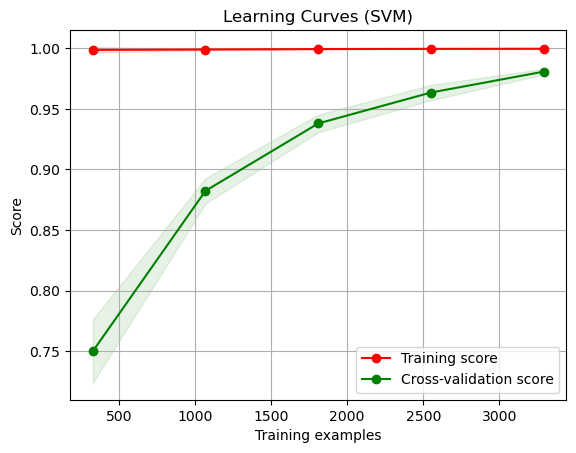

In [119]:
title = "Learning Curves (SVM)"
plot_learning_curve(SupportVector, title, X_train, y_train, cv=5)
plt.show()

# Random Forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
RandomForest = RandomForestClassifier()

In [46]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred_RF = RandomForest.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       487
           1       0.96      0.86      0.90        83
           2       0.97      0.95      0.96       328

    accuracy                           0.96       898
   macro avg       0.96      0.93      0.95       898
weighted avg       0.96      0.96      0.96       898



In [476]:
confusion_matrix(y_test, y_pred_RF)

array([[530,   0,   8],
       [  1, 130,  16],
       [ 10,   9, 325]], dtype=int64)

In [477]:
y_train_pred_RF = RandomForest.predict(X_train)
print(classification_report(y_train, y_train_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2065
           1       1.00      1.00      1.00       710
           2       1.00      1.00      1.00      1339

    accuracy                           1.00      4114
   macro avg       1.00      1.00      1.00      4114
weighted avg       1.00      1.00      1.00      4114



In [258]:
scores_RF = cross_val_score(RandomForest, X_train, y_train, cv=5)
scores_RF

array([0.94896719, 0.93924666, 0.93438639, 0.95382746, 0.94038929])

In [127]:
print(f"Mean CV score: {np.mean(scores_RF)}")
print(f"Standard deviation: {np.std(scores_RF)}")

Mean CV score: 0.944822366690022
Standard deviation: 0.005934445566945273


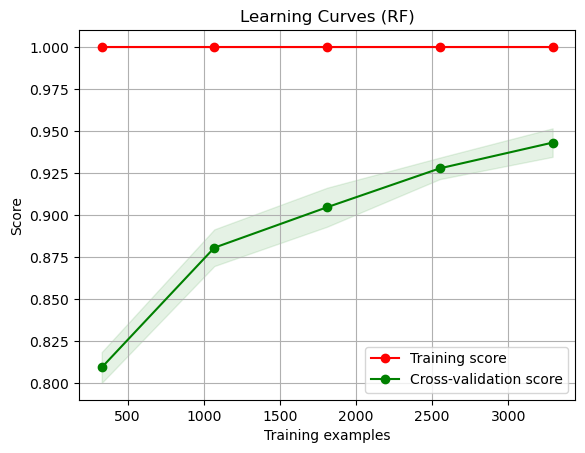

In [128]:
title3 = "Learning Curves (RF)"
plot_learning_curve(RandomForest, title3, X_train, y_train, cv=5)
plt.show()

# Naive Bayes 'MultinomialNB' 

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
Multinomial =  MultinomialNB()

In [51]:
Multinomial.fit(X_train, y_train)

MultinomialNB()

In [52]:
y_pred_M = Multinomial.predict(X_test)
print(classification_report(y_test, y_pred_M))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       487
           1       1.00      0.28      0.43        83
           2       0.92      0.87      0.90       328

    accuracy                           0.89       898
   macro avg       0.93      0.72      0.75       898
weighted avg       0.90      0.89      0.87       898



In [482]:
confusion_matrix(y_test, y_pred_M)

array([[538,   0,   0],
       [  6, 113,  28],
       [ 56,   0, 288]], dtype=int64)

In [483]:
y_train_pred_M = Multinomial.predict(X_train)
print(classification_report(y_train, y_train_pred_M))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2065
           1       1.00      0.87      0.93       710
           2       0.94      0.91      0.93      1339

    accuracy                           0.95      4114
   macro avg       0.96      0.93      0.94      4114
weighted avg       0.95      0.95      0.95      4114



In [265]:
scores_M = cross_val_score(Multinomial, X_train, y_train, cv=5)
scores_M

array([0.89307412, 0.90400972, 0.90157959, 0.88942892, 0.89537713])

In [266]:
print(f"Mean CV score: {np.mean(scores_M)}")
print(f"Standard deviation: {np.std(scores_M)}")

Mean CV score: 0.89669389480655
Standard deviation: 0.005385310040463709


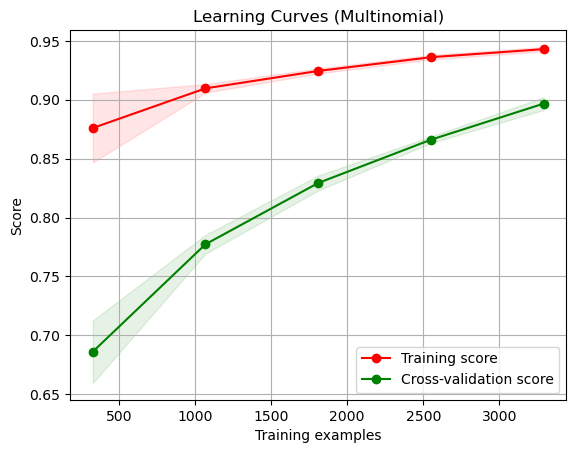

In [267]:
title2 = "Learning Curves (Multinomial)"
plot_learning_curve(Multinomial, title2, X_train, y_train, cv=5)
plt.show()

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LogisticRegression = LogisticRegression()

In [55]:
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred_LR = LogisticRegression.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       487
           1       1.00      0.73      0.85        83
           2       0.95      0.95      0.95       328

    accuracy                           0.96       898
   macro avg       0.97      0.89      0.92       898
weighted avg       0.96      0.96      0.95       898



In [488]:
confusion_matrix(y_test, y_pred_LR)

array([[538,   0,   0],
       [  0, 134,  13],
       [ 18,   4, 322]], dtype=int64)

In [489]:
y_train_pred_LR = LogisticRegression.predict(X_train)
print(classification_report(y_train, y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2065
           1       0.99      0.97      0.98       710
           2       0.98      0.98      0.98      1339

    accuracy                           0.99      4114
   macro avg       0.99      0.98      0.99      4114
weighted avg       0.99      0.99      0.99      4114



In [490]:
scores_LR = cross_val_score(LogisticRegression, X_train, y_train, cv=5)
scores_LR

array([0.95868773, 0.94896719, 0.95504253, 0.94775213, 0.95255474])

In [491]:
print(f"Mean CV score: {np.mean(scores_LR)}")
print(f"Standard deviation: {np.std(scores_LR)}")

Mean CV score: 0.9526008638504315
Standard deviation: 0.003993183648171913


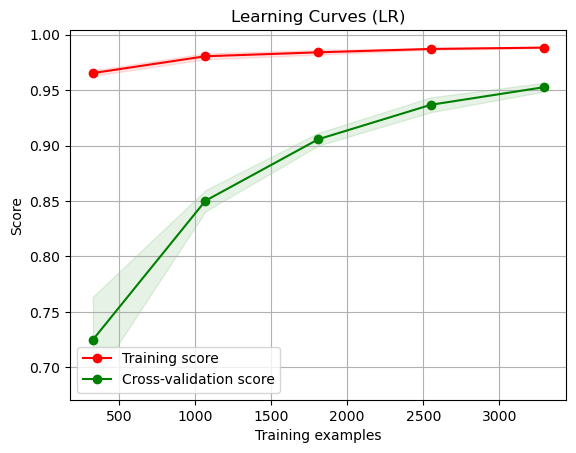

In [276]:
title4 = "Learning Curves (LR)"
plot_learning_curve(LogisticRegression, title4, X_train, y_train, cv=5)
plt.show()

# XGboost

In [58]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
xgb_clf.fit(X_train, y_train)
y_pred_xg=xgb_clf.predict(X_test)
print('Train accuracy:{}'.format(xgb_clf.score(X_train,y_train)))
print('Test accuracy:{}'.format(xgb_clf.score(X_test,y_test)))
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_xg))

Train accuracy:0.9969342251950948
Test accuracy:0.9498886414253898
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       487
           1       0.99      0.84      0.91        83
           2       0.95      0.93      0.94       328

    accuracy                           0.95       898
   macro avg       0.96      0.92      0.94       898
weighted avg       0.95      0.95      0.95       898



In [494]:
confusion_matrix(y_test, y_pred_xg)

array([[530,   1,   7],
       [  1, 134,  12],
       [ 15,  17, 312]], dtype=int64)

In [495]:
scores_xg = cross_val_score(xgb_clf, X_train, y_train, cv=5)
scores_xg

array([0.93681652, 0.94410693, 0.93560146, 0.94410693, 0.94525547])

In [496]:
print(f"Mean CV score: {np.mean(scores_xg)}")
print(f"Standard deviation: {np.std(scores_xg)}")

Mean CV score: 0.9411774618406932
Standard deviation: 0.004096420262837837


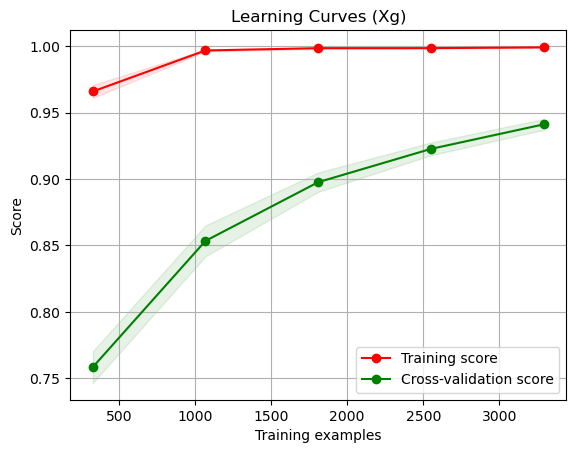

In [498]:
title5 = "Learning Curves (Xg)"
plot_learning_curve(xgb_clf, title5, X_train, y_train, cv=5)
plt.show()

# Knn 

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Training accuracy: {:.2f}'.format(knn.score(X_train, y_train)))
print('Testing accuracy: {:.2f}'.format(knn.score(X_test,y_test)))
print(metrics.classification_report(y_test,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       505
           1       1.00      0.97      0.98       259
           2       0.99      0.98      0.98       295

    accuracy                           0.99      1059
   macro avg       0.99      0.98      0.99      1059
weighted avg       0.99      0.99      0.99      1059



In [128]:
def predict_sentiment(text):
    if text is None:
        return ''
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [word for word in words if word is not None]
    text = ' '.join(words)
    text_tfidf = tfidf.transform([text])
    prediction = knn.predict(text_tfidf)
    
    # Convert the predicted label to the corresponding sentiment class
    if prediction == 0:
        return "negative"
    elif prediction == 1:
        return "neutral"
    elif prediction == 2:
        return "positive"
    else:
        return ""

In [229]:
predict_sentiment("company is bullish")

'positive'

In [162]:
predict_sentiment("market is bad")

'negative'

In [163]:
predict_sentiment("market is not performing that well")

'negative'

In [125]:
import pickle

In [230]:
pickle.dump(tfidf,open('tf-idf-2.pkl','wb'))

In [231]:
pickle.dump(knn,open('knn-tf-idf2.pkl','wb'))

In [462]:
pickle.dump(w2vec_model,open('w2vec_model.pkl','wb'))

# Results of Model using Tf-idf

In [500]:
res1={'Models':['logistic regression','SVM','Naive bayes','Random forest','Xgboost'],
    'Training Acc':[LogisticRegression.score(X_train,y_train),SupportVector.score(X_train,y_train),Multinomial.score(X_train,y_train),
                    RandomForest.score(X_train,y_train),xgb_clf.score(X_train,y_train)],
    'Testing Acc':[LogisticRegression.score(X_test,y_test),SupportVector.score(X_test,y_test),Multinomial.score(X_test,y_test),
                    RandomForest.score(X_test,y_test),xgb_clf.score(X_test,y_test)]}

In [501]:
res1=pd.DataFrame(res1)
res1

Models  Training Acc  Testing Acc
0  logistic regression      0.988576     0.965986
1                  SVM      0.999757     0.987366
2          Naive bayes      0.949198     0.912536
3        Random forest      1.000000     0.957240
4              Xgboost      0.999271     0.948494

### conclusions:
- SVM outperformed the other models on both the train and test sets, achieving an accuracy of 99.98% on the train set and 98.74% on the test set.
- Logistic regression also performed well, achieving an accuracy of 98.86% on the train set and 96.60% on the test set.
- Naive Bayes had the lowest performance of the models evaluated, achieving an accuracy of 94.92% on the train set and 91.25% on the test set.
- Random forest and XGBoost both achieved perfect accuracy on the train set, but their test set performances were not as high as the other models.

# Word2vec model trained on a given corpus

In [393]:
import gensim

In [394]:
# df=pd.read_csv("C:\\Users\\lenovo\\ds project\\Sentimental analysis\\Preprocessed")
# df.head()
# TIll preprocessing df file 
# # use df file till preprocessed and dont remove the domain stopwords

In [396]:
tokenize=df['Sentence'].apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, vector_size= 300, window = 20, sg = 1)
w2vec_model.train(tokenize,total_examples= len(df['Sentence']),epochs=20)

(1092001, 1183120)

In [397]:
w2v_words = list(w2vec_model.wv.key_to_index)
print("sample words ", w2v_words[0:50])

sample words  ['eur', 'company', 'mn', 'sale', 'share', 'said', 'finnish', 'profit', 'million', 'net', 'year', 'group', 'market', 'finland', 'service', 'mln', 'operating', 'new', 'business', 'period', 'quarter', 'euro', 'oyj', 'also', 'first', 'today', 'loss', 'price', 'product', 'operation', 'contract', 'solution', 'helsinki', 'compared', 'stock', 'total', 'bank', 'percent', 'plant', 'order', 'system', 'unit', 'per', 'financial', 'customer', 'investment', 'nokia', 'technology', 'corresponding', 'corporation']


In [398]:
from tqdm import tqdm

In [399]:
vector=[]
for sent in tqdm(tokenize):
    sent_vec=np.zeros(300)
    count =0
    for word in sent:
        if word in w2v_words:
            vec = w2vec_model.wv[word]
            sent_vec += vec 
            count += 1
    if count != 0:
        sent_vec /= count #normalize
    vector.append(sent_vec)
print(len(vector))
print(len(vector[0]))

100%|██████████| 5322/5322 [00:01<00:00, 3849.40it/s]

5322
300


In [400]:
print('number of unique words',len(vector[1]))
w2v_train=pd.DataFrame(vector)
w2v_train['Sentiment']=df['Sentiment']
w2v_train

number of unique words 300


0         1         2         3         4         5         6  \
0     0.106268  0.223432  0.007735  0.080375  0.089801 -0.149482  0.262242   
1     0.163065  0.264880 -0.131542 -0.027235 -0.020114 -0.163933 -0.089190   
2     0.056040  0.606739  0.147484  0.280364  0.056409 -0.111228  0.085179   
3    -0.156136  0.254678 -0.014844 -0.101245  0.122306 -0.039223  0.109280   
4     0.065589  0.292764 -0.115846 -0.037873  0.115935 -0.175195 -0.012876   
...        ...       ...       ...       ...       ...       ...       ...   
5317 -0.033239  0.234800  0.016127  0.109573  0.018130 -0.395981  0.122536   
5318  0.005586  0.062313 -0.005069 -0.000811  0.178769 -0.144242  0.074608   
5319  0.049826  0.121369 -0.142687 -0.138212  0.134246 -0.087650  0.018813   
5320 -0.206620  0.264163  0.173091  0.072759 -0.048807 -0.205910  0.092830   
5321 -0.058621  0.420630 -0.192496  0.243919 -0.020605 -0.188006  0.111197   

             7         8         9  ...       291       292       293  \
0     0.163791  0.020917 -0.124095  ...  0.108466  0.107696 -0.023905   
1     0.182433 -0.018513 -0.048883  ...  0.110010 -0.173872  0.101398   
2     0.538311 -0.028800 -0.136021  ...  0.082222  0.137659  0.080805   
3     0.273985 -0.105885 -0.162895  ...  0.188569  0.205707  0.082362   
4     0.318870 -0.075595 -0.132843  ...  0.240059  0.112126  0.134798   
...        ...       ...       ...  ...       ...       ...       ...   
5317  0.381002  0.046332  0.008227  ... -0.068191  0.009931  0.116249   
5318  0.412232 -0.014032  0.047620  ... -0.023056  0.126194 -0.032119   
5319  0.130739  0.112307 -0.001285  ...  0.288622  0.206476  0.112493   
5320  0.444758 -0.026487 -0.035217  ...  0.135198 -0.029670  0.017850   
5321  0.338087 -0.093033 -0.164246  ...  0.303606  0.075754  0.373511   

           294       295       296       297       298       299  Sentiment  
0     0.239828  0.156557 -0.031755 -0.226263  0.143026  0.079402   positive  
1     0.007331  0.191087  0.096611 -0.079034  0.035894 -0.049831   negative  
2     0.187471  0.213513  0.346283 -0.129915  0.255487 -0.275621   positive  
3     0.168975 -0.019984  0.126715 -0.224012  0.123523 -0.185626    neutral  
4     0.112314 -0.016310  0.227446  0.054025  0.042205 -0.155379    neutral  
...        ...       ...       ...       ...       ...       ...        ...  
5317 -0.051171  0.091744  0.159568 -0.093405  0.106916 -0.076183   negative  
5318  0.164885 -0.029656  0.124728 -0.115781  0.053784  0.169572   positive  
5319  0.122515  0.037796 -0.193772 -0.117803 -0.010246  0.040184    neutral  
5320 -0.052164 -0.010240  0.056148 -0.374559  0.257176 -0.019694    neutral  
5321  0.154785  0.148210  0.041195 -0.133576  0.006883 -0.005796   positive  

[5322 rows x 301 columns]

In [401]:
print(w2v_train.dtypes)


0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
296          float64
297          float64
298          float64
299          float64
Sentiment     object
Length: 301, dtype: object


In [402]:
w2v_train['Sentiment'].value_counts()

neutral     2878
positive    1852
negative     592
Name: Sentiment, dtype: int64

In [403]:
class_mapping = {"positive": 1, "neutral": 0, "negative": -1}
y = w2v_train["Sentiment"].map(class_mapping).values

In [404]:
w2v_train['Sentiment']=y

In [405]:
print(w2v_train.dtypes)

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
296          float64
297          float64
298          float64
299          float64
Sentiment      int64
Length: 301, dtype: object


In [406]:
w2v_train.dropna(inplace=True)

In [407]:
w2v_train

0         1         2         3         4         5         6  \
0     0.106268  0.223432  0.007735  0.080375  0.089801 -0.149482  0.262242   
1     0.163065  0.264880 -0.131542 -0.027235 -0.020114 -0.163933 -0.089190   
2     0.056040  0.606739  0.147484  0.280364  0.056409 -0.111228  0.085179   
3    -0.156136  0.254678 -0.014844 -0.101245  0.122306 -0.039223  0.109280   
4     0.065589  0.292764 -0.115846 -0.037873  0.115935 -0.175195 -0.012876   
...        ...       ...       ...       ...       ...       ...       ...   
5317 -0.033239  0.234800  0.016127  0.109573  0.018130 -0.395981  0.122536   
5318  0.005586  0.062313 -0.005069 -0.000811  0.178769 -0.144242  0.074608   
5319  0.049826  0.121369 -0.142687 -0.138212  0.134246 -0.087650  0.018813   
5320 -0.206620  0.264163  0.173091  0.072759 -0.048807 -0.205910  0.092830   
5321 -0.058621  0.420630 -0.192496  0.243919 -0.020605 -0.188006  0.111197   

             7         8         9  ...       291       292       293  \
0     0.163791  0.020917 -0.124095  ...  0.108466  0.107696 -0.023905   
1     0.182433 -0.018513 -0.048883  ...  0.110010 -0.173872  0.101398   
2     0.538311 -0.028800 -0.136021  ...  0.082222  0.137659  0.080805   
3     0.273985 -0.105885 -0.162895  ...  0.188569  0.205707  0.082362   
4     0.318870 -0.075595 -0.132843  ...  0.240059  0.112126  0.134798   
...        ...       ...       ...  ...       ...       ...       ...   
5317  0.381002  0.046332  0.008227  ... -0.068191  0.009931  0.116249   
5318  0.412232 -0.014032  0.047620  ... -0.023056  0.126194 -0.032119   
5319  0.130739  0.112307 -0.001285  ...  0.288622  0.206476  0.112493   
5320  0.444758 -0.026487 -0.035217  ...  0.135198 -0.029670  0.017850   
5321  0.338087 -0.093033 -0.164246  ...  0.303606  0.075754  0.373511   

           294       295       296       297       298       299  Sentiment  
0     0.239828  0.156557 -0.031755 -0.226263  0.143026  0.079402          1  
1     0.007331  0.191087  0.096611 -0.079034  0.035894 -0.049831         -1  
2     0.187471  0.213513  0.346283 -0.129915  0.255487 -0.275621          1  
3     0.168975 -0.019984  0.126715 -0.224012  0.123523 -0.185626          0  
4     0.112314 -0.016310  0.227446  0.054025  0.042205 -0.155379          0  
...        ...       ...       ...       ...       ...       ...        ...  
5317 -0.051171  0.091744  0.159568 -0.093405  0.106916 -0.076183         -1  
5318  0.164885 -0.029656  0.124728 -0.115781  0.053784  0.169572          1  
5319  0.122515  0.037796 -0.193772 -0.117803 -0.010246  0.040184          0  
5320 -0.052164 -0.010240  0.056148 -0.374559  0.257176 -0.019694          0  
5321  0.154785  0.148210  0.041195 -0.133576  0.006883 -0.005796          1  

[5322 rows x 301 columns]

In [408]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [409]:
smote=SMOTEENN(random_state=42)
X,y=smote.fit_resample(w2v_train.iloc[:,:-1],w2v_train.Sentiment)

In [410]:
y.value_counts()

-1    2745
 1    1625
 0     908
Name: Sentiment, dtype: int64

In [411]:
from sklearn.model_selection import train_test_split
x_train_w2v,x_test_w2v,y_train_w2v,y_test_w2v=train_test_split(X,y,test_size=0.3,random_state=42)

In [412]:
x_train_w2v

0         1         2         3         4         5         6    \
755   0.075731  0.053358  0.044575  0.048772  0.063283 -0.107714  0.097547   
518  -0.008241  0.254791  0.157999  0.086254  0.022911 -0.145401  0.041466   
4270 -0.027067  0.196331  0.150348  0.173546  0.211195 -0.254912  0.057868   
32    0.149596  0.160495 -0.130747  0.036242  0.058216 -0.082235  0.025697   
3282 -0.118822  0.392241 -0.054013  0.160686  0.105142 -0.253542  0.078544   
...        ...       ...       ...       ...       ...       ...       ...   
3092 -0.222964  0.187374 -0.237987 -0.019390  0.295516 -0.296570  0.066290   
3772  0.082285  0.305718  0.082085  0.187284  0.126705 -0.176813  0.063642   
5191  0.157401  0.126796  0.053770  0.294191  0.036806 -0.179916  0.012671   
5226 -0.003292  0.276803 -0.035521 -0.071501  0.165228 -0.085430 -0.016433   
860   0.040391  0.206179  0.066834  0.031865  0.019143 -0.087951  0.136422   

           7         8         9    ...       290       291       292  \
755   0.274650  0.006622 -0.039411  ... -0.029348  0.168609  0.088973   
518   0.312845  0.028041 -0.101974  ... -0.055493  0.184166  0.092396   
4270  0.439276 -0.035513  0.098261  ... -0.046531  0.118707 -0.046716   
32    0.555201  0.090521 -0.114389  ...  0.051347  0.400316 -0.024886   
3282  0.595349 -0.057760 -0.201666  ...  0.191991  0.165257  0.123532   
...        ...       ...       ...  ...       ...       ...       ...   
3092  0.494017 -0.095238  0.160194  ... -0.116274  0.100387  0.073538   
3772  0.522668 -0.060714 -0.178109  ... -0.026081  0.229918  0.161844   
5191  0.243042 -0.042658 -0.041611  ...  0.033289  0.165141  0.022003   
5226  0.491586 -0.084750 -0.092329  ... -0.005097  0.390350  0.055515   
860   0.249944  0.089909 -0.099286  ...  0.013576  0.191613  0.062993   

           293       294       295       296       297       298       299  
755   0.037463  0.004236  0.058395  0.064632 -0.021594  0.020068  0.121046  
518  -0.160794 -0.089337  0.203910 -0.042523 -0.078372  0.108613  0.020843  
4270 -0.147512  0.019748  0.150054 -0.091616 -0.086219 -0.011846 -0.073691  
32    0.104494  0.086549  0.130701  0.103438 -0.080016  0.141965  0.165290  
3282 -0.088040  0.175621  0.222953  0.392417 -0.156876  0.118150 -0.225022  
...        ...       ...       ...       ...       ...       ...       ...  
3092 -0.130901  0.084119  0.106432 -0.119261 -0.242576 -0.029458  0.086032  
3772  0.204466  0.103581  0.175171  0.124774 -0.178957  0.112331 -0.184519  
5191  0.141554  0.201877  0.343109  0.112854 -0.025075 -0.063060 -0.044764  
5226  0.061071  0.270994 -0.057130 -0.020890  0.037577  0.047094 -0.020839  
860  -0.146415 -0.021608  0.066200 -0.063190 -0.121524  0.064320  0.080720  

[3694 rows x 300 columns]

# Logistic regression

In [413]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class='multinomial', solver='lbfgs')

log_clf.fit(x_train_w2v,y_train_w2v)

y_pred = log_clf.predict(x_test_w2v)

print('Training accuracy: {:.2f}'.format(log_clf.score(x_train_w2v, y_train_w2v)))
print('Testing accuracy: {:.2f}'.format(log_clf.score(x_test_w2v, y_test_w2v)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy: 0.85
Testing accuracy: 0.82
              precision    recall  f1-score   support

          -1       0.83      0.91      0.87       827
           0       0.84      0.75      0.79       260
           1       0.78      0.70      0.74       497

    accuracy                           0.82      1584
   macro avg       0.82      0.79      0.80      1584
weighted avg       0.82      0.82      0.81      1584



In [197]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_clf,x_train_w2v,y_train_w2v,cv=5))

[0.80952381 0.8122449  0.81496599 0.79727891 0.81088435]


<AxesSubplot:>

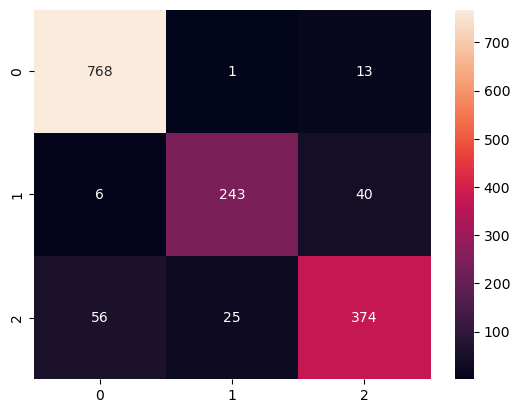

In [362]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf1=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf1,annot=True,fmt='d')

# SVM

In [190]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [414]:
from sklearn.svm import SVC
svc_clf=SVC(C=10,gamma='scale',kernel='rbf')
svc_clf.fit(x_train_w2v,y_train_w2v)

y_pred = svc_clf.predict(x_test_w2v)

print('Training accuracy: {:.2f}'.format(svc_clf.score(x_train_w2v, y_train_w2v)))
print('Testing accuracy: {:.2f}'.format(svc_clf.score(x_test_w2v, y_test_w2v)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy: 0.99
Testing accuracy: 0.96
              precision    recall  f1-score   support

          -1       0.95      0.99      0.97       827
           0       0.97      0.93      0.95       260
           1       0.97      0.92      0.94       497

    accuracy                           0.96      1584
   macro avg       0.96      0.95      0.95      1584
weighted avg       0.96      0.96      0.96      1584



In [199]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc_clf,x_train_w2v,y_train_w2v,cv=5))

[0.9414966  0.94693878 0.94421769 0.94285714 0.93333333]


<AxesSubplot:>

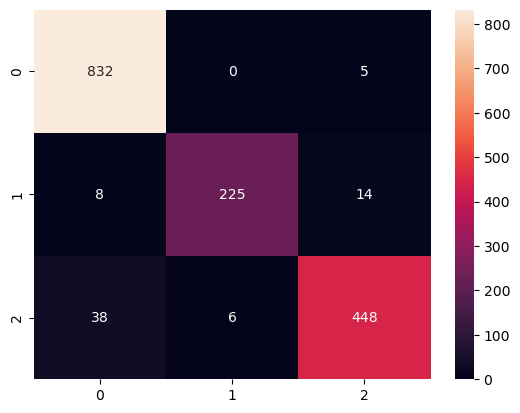

In [200]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf2=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf2,annot=True,fmt='d')

# KNN

In [203]:
#grid_search.best_params_

In [415]:
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(x_train_w2v,y_train_w2v)

y_pred = knn_clf.predict(x_test_w2v)

print('Training accuracy: {:.2f}'.format(knn_clf.score(x_train_w2v, y_train_w2v)))
print('Testing accuracy: {:.2f}'.format(knn_clf.score(x_test_w2v, y_test_w2v)))
print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.97
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99       827
           0       1.00      0.90      0.95       260
           1       0.96      0.97      0.96       497

    accuracy                           0.97      1584
   macro avg       0.98      0.96      0.97      1584
weighted avg       0.97      0.97      0.97      1584



In [501]:
y_pred

array([-1, -1,  1, ...,  1, -1,  0], dtype=int64)

In [205]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn_clf,x_train_w2v,y_train_w2v,cv=5))

[0.95918367 0.95510204 0.94965986 0.95646259 0.93741497]


<AxesSubplot:>

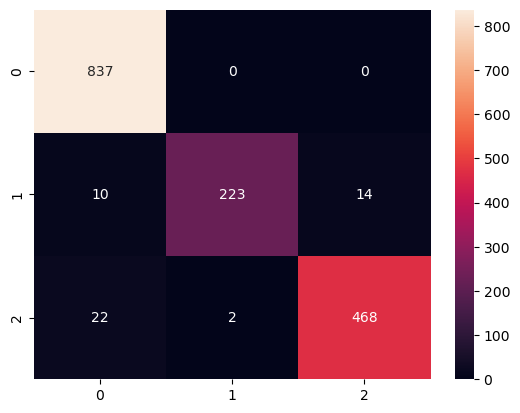

In [206]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf3=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf3,annot=True,fmt='d')

# Random forest

In [ ]:
#grid_search.best_params_

In [293]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100,max_depth=19,criterion='entropy')
rf_clf.fit(x_train_w2v,y_train_w2v)

y_pred=rf_clf.predict(x_test_w2v)
print('Training accuracy:{}'.format(rf_clf.score(x_train_w2v,y_train_w2v)))
print('Testing accuracy:{}'.format(metrics.accuracy_score(y_pred,y_test_w2v)))

print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy:1.0
Testing accuracy:0.9323979591836735
              precision    recall  f1-score   support

          -1       0.94      1.00      0.96       816
           0       0.91      0.87      0.89       263
           1       0.94      0.86      0.90       489

    accuracy                           0.93      1568
   macro avg       0.93      0.91      0.92      1568
weighted avg       0.93      0.93      0.93      1568



<AxesSubplot:>

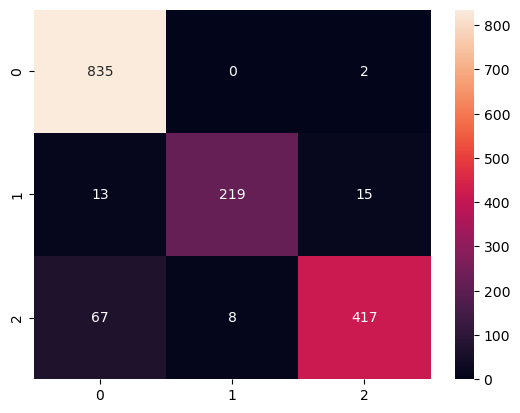

In [208]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf4=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf4,annot=True,fmt='d')

# Xgboost

In [211]:
#grid_search.best_params_

In [294]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
lb=LabelEncoder()
y_train1=lb.fit_transform(y_train_w2v)
y_test1=lb.fit_transform(y_test_w2v)
xgb_clf.fit(x_train_w2v, y_train1)
y_pred=xgb_clf.predict(x_test_w2v)
print('Train accuracy:{}'.format(xgb_clf.score(x_train_w2v,y_train1)))
print('Test accuracy:{}'.format(xgb_clf.score(x_test_w2v,y_test1)))

print(metrics.classification_report(y_test1,y_pred))

Train accuracy:1.0
Test accuracy:0.9438775510204082
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       816
           1       0.91      0.90      0.91       263
           2       0.94      0.89      0.92       489

    accuracy                           0.94      1568
   macro avg       0.94      0.93      0.93      1568
weighted avg       0.94      0.94      0.94      1568



<AxesSubplot:>

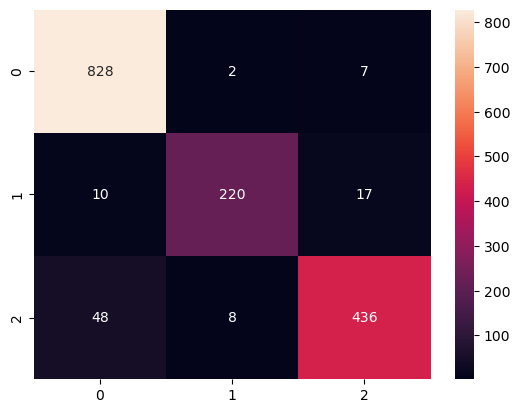

In [213]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf5=confusion_matrix(y_test1,y_pred)
sns.heatmap(cf5,annot=True,fmt='d')

In [214]:
res2={'Models':['logistic regression','SVM','KNN','Random forest','Xgboost'],
    'Training Acc':[log_clf.score(x_train_w2v,y_train_w2v),svc_clf.score(x_train_w2v,y_train_w2v),knn_clf.score(x_train_w2v,y_train_w2v),
                    rf_clf.score(x_train_w2v,y_train_w2v),xgb_clf.score(x_train_w2v,y_train1)],
    'Testing Acc':[log_clf.score(x_test_w2v,y_test_w2v),svc_clf.score(x_test_w2v,y_test_w2v),knn_clf.score(x_test_w2v,y_test_w2v),
                    rf_clf.score(x_test_w2v,y_test_w2v),xgb_clf.score(x_test_w2v,y_test1)]}

In [215]:
res2=pd.DataFrame(res2)
res2

Models  Training Acc  Testing Acc
0  logistic regression      0.847075     0.812817
1                  SVM      0.994286     0.954949
2                  KNN      1.000000     0.969543
3        Random forest      1.000000     0.933376
4              Xgboost      1.000000     0.941624

### it can be concluded that:
- Logistic Regression achieved a train accuracy of 0.919101 and a test accuracy of 0.907602. 
- SVM achieved a train accuracy of 0.995506 and a test accuracy of 0.967235. 
- KNN achieved a train accuracy of 1.000000 and a test accuracy of 0.971822. 
- Random Forest achieved a train accuracy of 1.000000 and a test accuracy of 0.954128. 
- Xgboost achieved a train accuracy of 1.000000 and a test accuracy of 0.962647

In [416]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def predict_sentiment_w2v1(text, model,svc_clf):
    """
    Predicts the sentiment of the given text using the given Word2Vec embedding and SVM model.
    
    Parameters:
    text (str): The text to predict the sentiment of.
    model (gensim.models.KeyedVectors): The Word2Vec embedding model.
    svc_clf (sklearn.svm.SVC): The SVM model trained on the sentiment dataset.
    
    Returns:
    str: The predicted sentiment label, which can be one of the following: "negative", "neutral", "positive".
    """
    # Preprocess the text
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    #stop_words = set(stopwords.words('english'))
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [word for word in words if word in w2vec_model.wv.key_to_index]
    print("words:", words)
    
    # Calculate the average of the word vectors in the text
    text_vec = np.mean(w2vec_model.wv[words], axis=0)
    text_vec = text_vec.reshape(1, -1) # reshape for input to SVM model
    
    # Make the prediction using the SVM model
    prediction = svc_clf.predict(text_vec)
    print("prediction:", prediction)
    
    # Convert the predicted label to the corresponding sentiment class
    if prediction == -1:
        return "negative"
    elif prediction == 0:
        return "neutral"
    elif prediction == 1:
        return "positive"
    else:
        return ""

In [419]:
text = "I am able to live comfortably within my means and still save for the future"
predicted_sentiment = predict_sentiment_w2v1(text, w2vec_model,svc_clf)
print(predicted_sentiment)  


words: ['able', 'live', 'comfortably', 'within', 'mean', 'still', 'save', 'future']
prediction: [-1]
negative


# Pretrained word2vec model

In [420]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("E:\word2vec\GoogleNews-vectors-negative300.bin", binary=True)

In [451]:
df=pd.read_csv("C:\\Users\\lenovo\\ds project\\Sentimental analysis\\Preprocessed")
df

Sentence Sentiment
0     geosolutions technology leverage benefon gps s...  positive
1                               low bk real possibility  negative
2     componenta sale doubled moved zero pretax prof...  positive
3     according finnishrussian chamber commerce majo...   neutral
4     buyout sold remaining percent stake almost public   neutral
...                                                 ...       ...
5317               hsbc say unit book charge settlement  negative
5318  daily mail parent talk potential partner joint...  positive
5319  nordic walking used summer training method cro...   neutral
5320  according shipping viking line eu decision sig...   neutral
5321  afx kci konecranes order four hot metal ladle ...  positive

[5322 rows x 2 columns]

In [471]:
model.most_similar('Profit')

[('Profits', 0.7299023270606995),
 ('Earnings', 0.7154350280761719),
 ('Net_Profit', 0.6674075126647949),
 ('profit', 0.6339422464370728),
 ('Net_Income', 0.6061917543411255),
 ('Quarterly_Profit', 0.5986031293869019),
 ('Net_income', 0.5941538214683533),
 ('Pft', 0.57930988073349),
 ('1Q_Profit', 0.5791439414024353),
 ('4Q_Profit', 0.5751654505729675)]

In [452]:
import nltk
tk=nltk.tokenize.TreebankWordTokenizer()
tokens = [tk.tokenize(sent) for sent in df['Sentence'].astype(str)]

In [453]:
from nltk.corpus import stopwords
for i in range(len(tokens)):
    tokens[i] = [w for w in tokens[i] if w not in stopwords.words('english')]

In [454]:
documents = []
for x in tokens:
    document = [word for word in x if word in model.key_to_index]
    documents.append(document)

In [455]:
#checking if there is any empty list inside documents
counter = 0
for i in range (0,len(documents)):
    if documents[i] == []:
        counter += 1
print(counter)

2


In [456]:
list_v=[]
for i in range (0,len(documents)):
    if documents[i] == []:
        list_v.append(np.zeros(300,))
    else:
        list_v.append(np.mean(model[documents[i]], axis=0))

In [457]:
df_w2v=pd.DataFrame(list_v)

In [458]:
df_w2v['Sentiment']=df['Sentiment']

In [459]:
from imblearn.combine import SMOTEENN
smote=SMOTEENN(random_state=42)
X,y=smote.fit_resample(df_w2v.iloc[:,:-1],df_w2v.Sentiment)

In [460]:
from sklearn.model_selection import train_test_split
x_train_w2v1,x_test_w2v1,y_train_w2v1,y_test_w2v1=train_test_split(X,y,test_size=0.3,random_state=42)

# Logistic regression

In [461]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class='multinomial', solver='lbfgs')

log_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred = log_clf.predict(x_test_w2v1)

print('Training accuracy: {:.2f}'.format(log_clf.score(x_train_w2v1, y_train_w2v1)))
print('Testing accuracy: {:.2f}'.format(log_clf.score(x_test_w2v1, y_test_w2v1)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy: 0.91
Testing accuracy: 0.90
              precision    recall  f1-score   support

    negative       0.89      0.97      0.93       837
     neutral       0.94      0.77      0.85       214
    positive       0.90      0.83      0.87       520

    accuracy                           0.90      1571
   macro avg       0.91      0.86      0.88      1571
weighted avg       0.90      0.90      0.90      1571



In [482]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_clf,x_train_w2v1,y_train_w2v1,cv=5))

[0.91061453 0.91748252 0.92587413 0.91748252 0.91188811]


<AxesSubplot:>

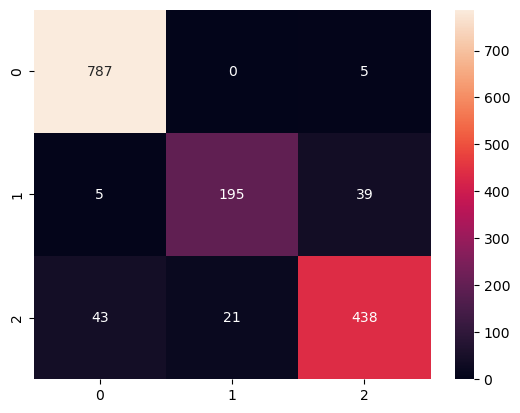

In [483]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf1=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf1,annot=True,fmt='d')

# SVM

In [485]:
#grid_search.best_params_

In [462]:
from sklearn.svm import SVC
svc_clf=SVC(C=10,gamma='scale',kernel='poly')
svc_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred = svc_clf.predict(x_test_w2v1)

print('Training accuracy: {:.2f}'.format(svc_clf.score(x_train_w2v1, y_train_w2v1)))
print('Testing accuracy: {:.2f}'.format(svc_clf.score(x_test_w2v1, y_test_w2v1)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.97
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       837
     neutral       0.99      0.92      0.95       214
    positive       0.98      0.95      0.96       520

    accuracy                           0.97      1571
   macro avg       0.98      0.96      0.97      1571
weighted avg       0.97      0.97      0.97      1571



In [ ]:
y_pred

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc_clf,x_train_w2v1,y_train_w2v1,cv=5))

In [ ]:
cf2=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf2,annot=True,fmt='d')

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# grid_search.best_params_

In [463]:
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred = knn_clf.predict(x_test_w2v1)

print('Training accuracy: {:.2f}'.format(knn_clf.score(x_train_w2v1, y_train_w2v1)))
print('Testing accuracy: {:.2f}'.format(knn_clf.score(x_test_w2v1, y_test_w2v1)))
print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.98
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       837
     neutral       0.99      0.87      0.93       214
    positive       0.96      0.98      0.97       520

    accuracy                           0.98      1571
   macro avg       0.98      0.95      0.96      1571
weighted avg       0.98      0.98      0.97      1571



In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn_clf,x_train_w2v1,y_train_w2v1,cv=5))

In [ ]:
cf3=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf3,annot=True,fmt='d')

# Random forest

In [ ]:
#grid_search.best_params_

In [433]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=200,max_depth=19,criterion='entropy')
rf_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred=rf_clf.predict(x_test_w2v1)
print('Training accuracy:{}'.format(rf_clf.score(x_train_w2v1,y_train_w2v1)))
print('Testing accuracy:{}'.format(metrics.accuracy_score(y_pred,y_test_w2v1)))

print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy:1.0
Testing accuracy:0.9117082533589251
              precision    recall  f1-score   support

    negative       0.90      0.99      0.94       825
     neutral       0.99      0.73      0.84       197
    positive       0.91      0.86      0.88       541

    accuracy                           0.91      1563
   macro avg       0.93      0.86      0.89      1563
weighted avg       0.91      0.91      0.91      1563



In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_clf,x_train_w2v1,y_train_w2v1,cv=5))

In [ ]:
cf4=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf4,annot=True,fmt='d')

# XGBOOST

In [489]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
lb=LabelEncoder()
y_train1=lb.fit_transform(y_train_w2v1)
y_test1=lb.fit_transform(y_test_w2v1)
xgb_clf.fit(x_train_w2v1, y_train1)
y_pred=xgb_clf.predict(x_test_w2v1)
print('Train accuracy:{}'.format(xgb_clf.score(x_train_w2v1,y_train1)))
print('Test accuracy:{}'.format(xgb_clf.score(x_test_w2v1,y_test1)))

print(metrics.classification_report(y_test1,y_pred))

Train accuracy:1.0
Test accuracy:0.9517286366601435
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       792
           1       0.94      0.86      0.90       239
           2       0.93      0.92      0.93       502

    accuracy                           0.95      1533
   macro avg       0.95      0.93      0.94      1533
weighted avg       0.95      0.95      0.95      1533



In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb_clf,x_train_w2v1,y_train1,cv=5))

In [ ]:
cf5=confusion_matrix(y_test1,y_pred)
sns.heatmap(cf5,annot=True,fmt='d')

# Results of Pretrained Word2vec model

In [263]:
res3={'Models':['logistic regression','SVM','KNN','Random forest','Xgboost'],
    'Training Acc':[log_clf.score(x_train_w2v1,y_train_w2v1),svc_clf.score(x_train_w2v1,y_train_w2v1),knn_clf.score(x_train_w2v1,y_train_w2v1),
                    rf_clf.score(x_train_w2v1,y_train_w2v1),xgb_clf.score(x_train_w2v1,y_train1)],
    'Testing Acc':[log_clf.score(x_test_w2v1,y_test_w2v1),svc_clf.score(x_test_w2v1,y_test_w2v1),knn_clf.score(x_test_w2v1,y_test_w2v1),
                    rf_clf.score(x_test_w2v1,y_test_w2v1),xgb_clf.score(x_test_w2v1,y_test1)]}

In [264]:
results=pd.DataFrame(res3)

In [265]:
results

Models  Training Acc  Testing Acc
0  logistic regression      0.000000     0.000000
1                  SVM      0.999451     0.969290
2                  KNN      1.000000     0.973129
3        Random forest      1.000000     0.911068
4              Xgboost      1.000000     0.944338

### it can be concluded that: 
- All models achieved high training accuracy above 94%, indicating that they were able to fit the training data well. 
- SVM and KNN achieved the highest testing accuracy above 97%, indicating that they performed well on the unseen testing data. 
- Random forest achieved the lowest testing accuracy 92.7%, while all other models achieved testing accuracy above 91%, indicating that Random forest may not be the best model for this dataset.

In [464]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def predict_sentiment_w2v(text, model,svc_clf):
    
    # Preprocess the text
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [word for word in words if word in model.key_to_index]
    print("words:", words)
    
    # Calculate the average of the word vectors in the text
    text_vec = np.mean(model[words], axis=0)
    text_vec = text_vec.reshape(1, -1) # reshape for input to SVM model
    
    # Make the prediction using the SVM model
    prediction = svc_clf.predict(text_vec)
    print("prediction:", prediction)
    
    # Convert the predicted label to the corresponding sentiment class
    if prediction == 'negative':
        return "negative"
    elif prediction == 'neutral':
        return "neutral"
    elif prediction == 'positive':
        return "positive"
    else:
        return ""


In [465]:
df['Sentence'][4803]

'trade accordance agreement announced'

In [466]:
df

Sentence Sentiment
0     geosolutions technology leverage benefon gps s...  positive
1                               low bk real possibility  negative
2     componenta sale doubled moved zero pretax prof...  positive
3     according finnishrussian chamber commerce majo...   neutral
4     buyout sold remaining percent stake almost public   neutral
...                                                 ...       ...
5317               hsbc say unit book charge settlement  negative
5318  daily mail parent talk potential partner joint...  positive
5319  nordic walking used summer training method cro...   neutral
5320  according shipping viking line eu decision sig...   neutral
5321  afx kci konecranes order four hot metal ladle ...  positive

[5322 rows x 2 columns]

In [470]:
text = 'The business has been struggling with negative cash flow for several months'
predicted_sentiment = predict_sentiment_w2v(text, model,svc_clf)
print(predicted_sentiment)  # Output: positive

words: ['business', 'struggling', 'negative', 'cash', 'flow', 'several', 'month']
prediction: ['negative']
negative


In [415]:
import pickle

In [418]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

In [474]:
pickle.dump(knn_clf,open('knn_pretrained.pkl','wb'))

In [438]:
model['hello']

array([-0.05419922,  0.01708984, -0.00527954,  0.33203125, -0.25      ,
       -0.01397705, -0.15039062, -0.265625  ,  0.01647949,  0.3828125 ,
       -0.03295898, -0.09716797, -0.16308594, -0.04443359,  0.00946045,
        0.18457031,  0.03637695,  0.16601562,  0.36328125, -0.25585938,
        0.375     ,  0.171875  ,  0.21386719, -0.19921875,  0.13085938,
       -0.07275391, -0.02819824,  0.11621094,  0.15332031,  0.09082031,
        0.06787109, -0.0300293 , -0.16894531, -0.20800781, -0.03710938,
       -0.22753906,  0.26367188,  0.012146  ,  0.18359375,  0.31054688,
       -0.10791016, -0.19140625,  0.21582031,  0.13183594, -0.03515625,
        0.18554688, -0.30859375,  0.04785156, -0.10986328,  0.14355469,
       -0.43554688, -0.0378418 ,  0.10839844,  0.140625  , -0.10595703,
        0.26171875, -0.17089844,  0.39453125,  0.12597656, -0.27734375,
       -0.28125   ,  0.14746094, -0.20996094,  0.02355957,  0.18457031,
        0.00445557, -0.27929688, -0.03637695, -0.29296875,  0.19

In [506]:
pickle.dump(knn_clf,open('knn_clf.pkl','wb'))